# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Try loading one file

# Assume the dataset is on this local path
df = pd.read_parquet(r'E:\AI master\Assignments\EDA\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [6]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'E:\AI master\Assignments\EDA\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        month_data = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        month_data['date'] = pd.DatetimeIndex(month_data['tpep_pickup_datetime']).date
        # Loop through dates and then loop through every hour of each date
        for date in month_data['date'].unique():
            # Iterate through each hour of the selected date
            date_data = month_data[month_data['date'] == date].drop(columns='date')
            date_data['hour'] = pd.DatetimeIndex(date_data['tpep_pickup_datetime']).hour
            for hour in date_data['hour'].unique():
                hour_data = date_data[date_data['hour'] == hour].drop(columns='hour')
                # Sample 5% of the hourly data randomly
                hour_data = hour_data.sample(frac = 0.05, random_state = 42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, hour_data])
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [9]:
# Show the information of sample DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 2698522
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [10]:
# Store the df in csv/parquet
df.to_parquet(r'E:\AI master\Assignments\EDA\sample.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [11]:
# Load the new data file
df = pd.read_parquet(r'E:\AI master\Assignments\EDA\sample.parquet')

In [12]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
428             2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1113            2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
819             2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3192            2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
2995263         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
428               7.74         1.0                  N           138   
1113              1.24         1.0                  N           161   
819               1.44         1.0                  N           237   
3192              0.54         1.0                  N           143   
2995263          19.24         NaN               None            66   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
428               256             2        32.40    6.0      0.5        0.00   
1113              237             1         7.90    1.0      0.5        2.58   
819               141             2        11.40    1.0      0.5        0.00   
3192              142             2         6.50    1.0      0.5        0.00   
2995263           107             0        25.64    0.0      0.5        5.93   

         tolls_amount  improvement_surcharge  total_amount  \
428               0.0                    1.0         41.15   
1113              0.0                    1.0         15.48   
819               0.0                    1.0         16.40   
3192              0.0                    1.0         11.50   
2995263           0.0                    1.0         35.57   

         congestion_surcharge  airport_fee  Airport_fee  
428                       0.0         1.25          NaN  
1113                      2.5         0.00          NaN  
819                       2.5         0.00          NaN  
3192                      2.5         0.00          NaN  
2995263                   NaN          NaN          NaN

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 2698522
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [14]:
# Fix the index and drop any columns that are not needed
df.reset_index(inplace=True, drop=True)
# column store_and_fwd_flag is not meaningfull in this analysis
df = df.drop(columns='store_and_fwd_flag')

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [15]:
# The proportion of missing values in airport_fee and Airpot_fee
df[['Airport_fee', 'airport_fee']].isnull().mean() * 100

Airport_fee    11.250633
airport_fee    92.170270
dtype: float64

In [16]:
# Check if there are some records containing value in airpot_fee but not in Airpot_fee
df.loc[df['airport_fee'].notnull(), ['Airport_fee', 'airport_fee']]

Airport_fee  airport_fee
0               NaN         1.25
1               NaN         0.00
2               NaN         0.00
3               NaN         0.00
5               NaN         0.00
...             ...          ...
152082          NaN         0.00
152083          NaN         0.00
152084          NaN         0.00
152085          NaN         0.00
152086          NaN         0.00

[148483 rows x 2 columns]

In [17]:
# Combine the two airport fee columns
# Replacing null data in Airport_fee by the corresponding data in airport_fee. Then, remove column airport_fee.
df['Airport_fee'] = df[['Airport_fee', 'airport_fee']].apply(lambda x: x['Airport_fee'] if not x['Airport_fee'] else x['airport_fee'], axis=1)
df.drop(columns='airport_fee', inplace=True)


In [18]:
# The proportion of missing values in Airport_fee reduced from 11.25 % to 11.22 %
df['Airport_fee'].isnull().mean() * 100

11.225585319552838

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [19]:
# check where values of fare amount are negative
df['fare_amount'].lt(0).sum()

0

Did you notice something different in the `RatecodeID` column for above records?

In [20]:
# Analyse RatecodeID for the negative fare amounts
df['RatecodeID'].lt(0).sum()

0

In [21]:
# Find which columns have negative values
cols_has_negav = []
# Iterate through each columns of DataFrame
for col in df.columns:
  # check if the column's datatype is not numerical type
  if df[col].dtypes not in ('int64', 'float64'):
    continue
  # if column contains negative value
  if df[df[col].lt(0)].shape[0] > 0:
    cols_has_negav.append(col)

cols_has_negav


['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

In [22]:
# Calculate the proportion of negative values in these columns
df[cols_has_negav].lt(0).mean() * 100

extra                    0.000158
mta_tax                  0.003849
improvement_surcharge    0.004113
total_amount             0.004113
congestion_surcharge     0.002953
Airport_fee              0.000053
dtype: float64

In [23]:
# fix these negative values
# all records that contains negative values in any of these columns are removed
df = df[~df[cols_has_negav].lt(0).any(axis=1)]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [24]:
# Find the proportion of missing values in each column
df.isna().mean() * 100


VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.421045
trip_distance             0.000000
RatecodeID                3.421045
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.421045
Airport_fee              11.225315
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [25]:
# Display the rows with null values
print("The rows of passenger_count with null values:")
print(df[df['passenger_count'].isna()])
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

The rows of passenger_count with null values:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
1896313         1  2023-09-30 22:47:00   2023-09-30 22:59:51              NaN   
1896345         2  2023-09-30 22:26:44   2023-09-30 22:39:41              NaN   
1896356         1  2023-09-30 22:07:52   2023-09-30 22:13:26              NaN   
1896368         2  2023-09-30 22:50:39   2023-09-30 22:56:04              NaN   
1896397         2  2023-09-30 22:35:50   2023-09-30 22:43:17   

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [26]:
# Fix missing values in 'RatecodeID'
# Fill all missing values with the most frequency values
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [27]:
# handle null values in congestion_surcharge
# Fill all missing values with the median values
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [28]:
df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
RatecodeID                    0
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
Airport_fee              212868
dtype: int64

In [29]:
# Handle any remaining missing values
# The remain column containing missing values is Airport_fee. Check the value counts of it
df['Airport_fee'].fillna(df['Airport_fee'].median(), inplace=True)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [30]:
# Describe the data and check if there are any potential outliers present
pd.options.display.float_format = '{:.2f}'.format
print(df.describe())
# Check for potential out of place values in various columns

        VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count 1896321.00                     1896321                     1896321   
mean        1.73  2023-07-02 19:59:00.671688  2023-07-02 20:16:26.662165   
min         1.00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%         1.00         2023-04-02 16:09:03         2023-04-02 16:27:09   
50%         2.00         2023-06-27 15:43:16         2023-06-27 16:00:27   
75%         2.00         2023-10-06 19:36:18         2023-10-06 19:53:02   
max         6.00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std         0.45                         NaN                         NaN   

       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count       1896321.00     1896321.00  1896321.00    1896321.00    1896321.00   
mean              1.36           3.86        1.61        165.28        164.05   
min               0.00           0.00        1.00          1.00         

In [31]:
# check if the drop off time is earlier than the pick up
df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
176858          6  2023-10-05 16:10:14   2023-10-05 16:10:03             1.00   
183835          6  2023-10-06 19:10:49   2023-10-06 19:10:33             1.00   
204130          6  2023-10-10 19:10:57   2023-10-10 19:10:36             1.00   
236961          6  2023-10-16 13:10:43   2023-10-16 13:10:23             1.00   
253335          6  2023-10-19 10:10:42   2023-10-19 10:10:22             1.00   
...           ...                  ...                   ...              ...   
1813446         6  2023-09-12 06:09:25   2023-09-12 06:09:22             1.00   
1856456         6  2023-09-20 10:09:24   2023-09-20 10:09:18             1.00   
1856937         6  2023-09-20 12:09:49   2023-09-20 12:09:26             1.00   
1861988         6  2023-09-21 11:09:43   2023-09-21 11:09:14             1.00   
1876918         6  2023-09-27 16:09:51   2023-09-27 16:09:32             1.00   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
176858            7.50        1.00           265           196             0   
183835           14.26        1.00           265           220             0   
204130            3.88        1.00           265           261             0   
236961            1.72        1.00           265            32             0   
253335            6.04        1.00           265            75             0   
...                ...         ...           ...           ...           ...   
1813446          17.29        1.00           265            65             0   
1856456           3.74        1.00           265            92             0   
1856937           5.29        1.00           265           258             0   
1861988           6.60        1.00           265           259             0   
1876918           2.39        1.00           265            66             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
176858         54.20   0.00     0.50        0.00          0.00   
183835         66.89   0.00     0.50        0.00          0.00   
204130         27.20   0.00     0.50        0.00          0.00   
236961         15.20   0.00     0.50        0.00          0.00   
253335         40.22   0.00     0.50        0.00          0.00   
...              ...    ...      ...         ...           ...   
1813446        47.09   0.00     0.50        0.00          0.00   
1856456        31.20   0.00     0.50        0.00          0.00   
1856937        17.38   0.00     0.50        0.00          0.00   
1861988        36.14   0.00     0.50        0.00          0.00   
1876918        15.28   0.00     0.50        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
176858                    0.30         55.00                  2.50   
183835                    0.30         67.69                  2.50   
204130                    0.30         28.00                  2.50   
236961                    0.30         16.00                  2.50   
253335                    0.30         41.02                  2.50   
...                        ...           ...                   ...   
1813446                   0.30         47.89                  2.50   
1856456                   0.30         32.00                  2.50   
1856937                   0.30         18.18                  2.50   
1861988                   0.30         36.94                  2.50   
1876918                   0.30         16.08                  2.50   

         Airport_fee  
176858          0.00  
183835          0.00  
204130          0.00  
236961          0.00  
253335          0.00  
...              ...  
1813446         0.00  
1856456         0.00  
1856937         0.00  
1861988         0.00  
1876918         0.00  

[117 rows x 18 columns]

In [32]:
# Check if there is any trip that distance greater than 0 but trip duration less than or equal to 0
df['trip_duration_in_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df[(df['trip_distance'] > 0) & (df['trip_duration_in_minutes'] <= 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
38920           1  2023-01-09 18:51:54   2023-01-09 18:51:54             1.00   
40465           1  2023-01-10 14:03:08   2023-01-10 14:03:08             1.00   
104052          2  2023-01-22 15:36:44   2023-01-22 15:36:44             1.00   
124787          1  2023-01-26 08:54:55   2023-01-26 08:54:55             1.00   
176858          6  2023-10-05 16:10:14   2023-10-05 16:10:03             1.00   
...           ...                  ...                   ...              ...   
1856456         6  2023-09-20 10:09:24   2023-09-20 10:09:18             1.00   
1856937         6  2023-09-20 12:09:49   2023-09-20 12:09:26             1.00   
1858019         1  2023-09-20 16:35:55   2023-09-20 16:35:55             1.00   
1861988         6  2023-09-21 11:09:43   2023-09-21 11:09:14             1.00   
1876918         6  2023-09-27 16:09:51   2023-09-27 16:09:32             1.00   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
38920             1.30        1.00           162           162             1   
40465             0.60        1.00           170           170             1   
104052            0.06        5.00           264           264             1   
124787            7.80        1.00           244           244             1   
176858            7.50        1.00           265           196             0   
...                ...         ...           ...           ...           ...   
1856456           3.74        1.00           265            92             0   
1856937           5.29        1.00           265           258             0   
1858019           3.20        1.00           211           211             1   
1861988           6.60        1.00           265           259             0   
1876918           2.39        1.00           265            66             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
38920           8.60   5.00     0.50        3.75          0.00   
40465           5.10   2.50     0.50        2.25          0.00   
104052         77.00   0.00     0.00        0.00          0.00   
124787         37.30   2.50     0.50        8.25          0.00   
176858         54.20   0.00     0.50        0.00          0.00   
...              ...    ...      ...         ...           ...   
1856456        31.20   0.00     0.50        0.00          0.00   
1856937        17.38   0.00     0.50        0.00          0.00   
1858019        19.10   5.00     0.50        2.00          0.00   
1861988        36.14   0.00     0.50        0.00          0.00   
1876918        15.28   0.00     0.50        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
38920                     1.00         18.85                  2.50   
40465                     1.00         11.35                  2.50   
104052                    0.00         77.00                  0.00   
124787                    1.00         49.55                  2.50   
176858                    0.30         55.00                  2.50   
...                        ...           ...                   ...   
1856456                   0.30         32.00                  2.50   
1856937                   0.30         18.18                  2.50   
1858019                   1.00         27.60                  2.50   
1861988                   0.30         36.94                  2.50   
1876918                   0.30         16.08                  2.50   

         Airport_fee  trip_duration_in_minutes  
38920           0.00                      0.00  
40465           0.00                      0.00  
104052          0.00                      0.00  
124787          0.00                      0.00  
176858          0.00                     -0.18  
...              ...                       ...  
1856456         0.00                     -0.10  
1856937         0.00                     -0.38  


In [33]:
# check if the payment type is out of scope that defined in data dictionary
df[~df['payment_type'].isin([1, 2, 3, 4, 5, 6])]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00             1.00   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50             1.00   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18             1.00   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49             1.00   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06             1.00   
...           ...                  ...                   ...              ...   
1896313         1  2023-09-30 22:47:00   2023-09-30 22:59:51             1.00   
1896345         2  2023-09-30 22:26:44   2023-09-30 22:39:41             1.00   
1896356         1  2023-09-30 22:07:52   2023-09-30 22:13:26             1.00   
1896368         2  2023-09-30 22:50:39   2023-09-30 22:56:04             1.00   
1896397         2  2023-09-30 22:35:50   2023-09-30 22:43:17             1.00   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4                19.24        1.00            66           107             0   
15               10.77        1.00           151           106             0   
42                4.52        1.00           114           262             0   
43                9.19        1.00           239           256             0   
46                2.74        1.00            90            48             0   
...                ...         ...           ...           ...           ...   
1896313           0.00        1.00            68           170             0   
1896345           2.32        1.00           239            50             0   
1896356           0.00        1.00           238           238             0   
1896368           0.59        1.00           142            48             0   
1896397           1.38        1.00            50            68             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4              25.64   0.00     0.50        5.93          0.00   
15             45.38   0.00     0.50       11.19          6.55   
42             25.38   0.00     0.50        0.00          0.00   
43             40.00   0.00     0.50        2.20          0.00   
46             18.48   0.00     0.50        3.37          0.00   
...              ...    ...      ...         ...           ...   
1896313        17.91   0.00     0.50        0.00          0.00   
1896345        15.93   0.00     0.50        2.00          0.00   
1896356         7.83   0.00     0.50        0.00          0.00   
1896368        16.32   0.00     0.50        3.70          0.00   
1896397        14.48   0.00     0.50        3.70          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
4                         1.00         35.57                  2.50   
15                        1.00         67.12                  2.50   
42                        1.00         29.38                  2.50   
43                        1.00         46.20                  2.50   
46                        1.00         25.85                  2.50   
...                        ...           ...                   ...   
1896313                   1.00         21.91                  2.50   
1896345                   1.00         21.93                  2.50   
1896356                   1.00         11.83                  2.50   
1896368                   1.00         24.02                  2.50   
1896397                   1.00         22.18                  2.50   

         Airport_fee  trip_duration_in_minutes  
4               0.00                     18.00  
15              0.00                     33.00  
42              0.00                     16.95  
43              0.00                     29.77  
46              0.00                     28.18  
...              ...                       ...  
1896313         0.00                     12.85  
1896345         0.00                     12.95  


In [34]:
# check if distance is nearly 0 but the fare_amount is more than 300
df[(df['trip_distance'] <= 0.2) & (df['fare_amount'] >= 300)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
38446           1  2023-01-09 16:17:32   2023-01-09 16:20:41             1.00   
48112           1  2023-01-11 12:38:54   2023-01-11 12:38:54             0.00   
89410           2  2023-01-19 20:58:47   2023-01-19 20:58:51             4.00   
196226          2  2023-10-09 21:36:01   2023-10-09 21:39:15             1.00   
212823          1  2023-10-13 18:22:04   2023-10-13 18:22:38             1.00   
258172          2  2023-10-20 01:11:27   2023-10-20 01:13:03             1.00   
419399          1  2023-11-16 19:57:34   2023-11-16 19:57:55             1.00   
427379          2  2023-11-18 00:34:36   2023-11-18 00:34:44             1.00   
472850          2  2023-11-26 16:04:06   2023-11-26 16:04:12             1.00   
521658          2  2023-12-06 10:20:47   2023-12-06 10:21:00             1.00   
532967          2  2023-12-07 23:39:43   2023-12-07 23:39:59             1.00   
533529          1  2023-12-08 00:18:37   2023-12-08 00:18:53             1.00   
579396          2  2023-12-15 08:12:41   2023-12-15 08:13:46             1.00   
600371          2  2023-12-18 18:01:14   2023-12-18 18:01:51             2.00   
607834          2  2023-12-19 23:52:06   2023-12-19 23:52:11             2.00   
637841          2  2023-12-24 14:01:07   2023-12-24 14:01:44             1.00   
824163          1  2023-03-31 16:56:04   2023-03-31 16:57:02             1.00   
831696          1  2023-06-01 15:18:51   2023-06-01 15:20:07             1.00   
839466          2  2023-06-03 15:26:13   2023-06-03 15:26:13             1.00   
869029          1  2023-06-08 04:59:03   2023-06-08 04:59:38             2.00   
879795          2  2023-06-10 01:58:47   2023-06-10 01:59:16             1.00   
882010          1  2023-06-10 10:40:51   2023-06-10 10:41:38             1.00   
916653          2  2023-06-16 17:16:53   2023-06-16 17:17:05             4.00   
935413          2  2023-06-20 15:38:20   2023-06-20 15:38:30             1.00   
940511          2  2023-06-21 12:05:21   2023-06-21 12:05:42             1.00   
957438          1  2023-06-24 19:41:42   2023-06-24 19:43:18             1.00   
969270          1  2023-06-26 15:10:38   2023-06-26 15:10:59             1.00   
982109          2  2023-06-29 20:56:07   2023-06-29 20:56:15             1.00   
991873          1  2023-08-01 11:12:09   2023-08-01 11:12:09             0.00   
995180          2  2023-08-01 22:06:03   2023-08-01 22:06:41             2.00   
1015443         2  2023-08-06 02:41:17   2023-08-06 02:41:22             1.00   
1049782         2  2023-08-13 18:44:08   2023-08-13 18:44:22             4.00   
1082095         2  2023-08-20 21:39:04   2023-08-20 21:39:12             2.00   
1082104         2  2023-08-20 21:56:48   2023-08-20 21:56:59             2.00   
1102377         2  2023-08-25 16:13:28   2023-08-25 16:13:42             2.00   
1106718         1  2023-08-26 16:23:39   2023-08-26 16:26:29             1.00   
1109232         2  2023-08-27 23:24:00   2023-08-27 23:24:21             3.00   
1112294         2  2023-08-27 18:46:43   2023-08-27 18:47:01             1.00   
1173746         1  2023-02-09 07:37:30   2023-02-09 07:39:13             1.00   
1288909         2  2023-04-03 18:15:16   2023-04-03 18:15:21             2.00   
1305077         2  2023-04-05 21:16:43   2023-04-05 21:25:57             1.00   
1340234         2  2023-04-17 10:25:31   2023-04-17 10:25:48             1.00   
1372793         2  2023-04-16 18:54:35   2023-04-16 18:54:48             1.00   
1435641         2  2023-04-30 14:21:36   2023-04-30 14:22:11             4.00   
1502036         1  2023-05-15 13:28:42   2023-05-15 13:29:45             1.00   
1546131         2  2023-05-19 21:04:06   2023-05-19 21:04:22             2.00   
1564847         2  2023-05-22 19:38:15   2023-05-22 19:38:38             1.00   
1571657         2  2023-05-24 02:11:35   2023-05-24 02:11:57             1.00   
1636903         2  2023-07-07 18:37:42  

In [35]:
# check if the Rate code is out of scope that defined in data dictionary
df[~df['RatecodeID'].isin([1, 2, 3, 4, 5, 6])]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
372             1  2023-01-01 01:51:10   2023-01-01 02:19:45             1.00   
770             1  2023-01-01 02:30:32   2023-01-01 03:05:47             1.00   
1713            1  2023-01-01 10:11:12   2023-01-01 10:29:27             1.00   
1968            1  2023-01-01 11:39:40   2023-01-01 11:55:59             1.00   
2233            1  2023-01-01 12:55:17   2023-01-01 13:17:08             1.00   
...           ...                  ...                   ...              ...   
1893013         1  2023-09-30 12:21:00   2023-09-30 13:01:31             1.00   
1893221         1  2023-09-30 13:55:58   2023-09-30 14:20:03             1.00   
1893366         1  2023-09-30 13:52:38   2023-09-30 14:14:49             1.00   
1893380         1  2023-09-30 13:10:13   2023-09-30 14:09:53             1.00   
1894045         1  2023-09-30 16:27:07   2023-09-30 17:09:46             1.00   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
372               0.00       99.00            74            77             1   
770              10.10       99.00            28            86             1   
1713              0.00       99.00            35            77             1   
1968              2.90       99.00            42            47             1   
2233              2.60       99.00            41           167             1   
...                ...         ...           ...           ...           ...   
1893013           0.90       99.00            37           182             1   
1893221           1.90       99.00           232           158             1   
1893366           2.80       99.00           127           116             1   
1893380          16.80       99.00           205           247             1   
1894045           8.50       99.00            62           216             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
372            41.20   0.00     0.50        0.00          6.55   
770            36.50   0.00     0.50        0.00          0.00   
1713           14.00   0.00     0.50        0.00          0.00   
1968           22.50   0.00     0.50        0.00          0.00   
2233           20.50   0.00     0.50        0.00          0.00   
...              ...    ...      ...         ...           ...   
1893013        46.50   0.00     0.50        0.00          0.00   
1893221        18.50   0.00     0.50        0.00          0.00   
1893366        20.50   0.00     0.50        0.00          0.00   
1893380        50.50   0.00     0.50        0.00          6.94   
1894045        30.50   0.00     0.50        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
372                       1.00         49.25                  0.00   
770                       1.00         38.00                  0.00   
1713                      1.00         15.50                  0.00   
1968                      1.00         24.00                  0.00   
2233                      1.00         22.00                  0.00   
...                        ...           ...                   ...   
1893013                   1.00         48.00                  0.00   
1893221                   1.00         20.00                  0.00   
1893366                   1.00         22.00                  0.00   
1893380                   1.00         58.94                  0.00   
1894045                   1.00         32.00                  0.00   

         Airport_fee  trip_duration_in_minutes  
372             0.00                     28.58  
770             0.00                     35.25  
1713            0.00                     18.25  
1968            0.00                     16.32  
2233            0.00                     21.85  
...              ...                       ...  
1893013         0.00                     40.52  
1893221         0.00                     24.08  


In [36]:
# check if fare_amount greater than total_amount
df[df['fare_amount'] > df['total_amount']]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, trip_duration_in_minutes]
Index: []

In [37]:
# check if congestion_surcharge greater than total_amount
df[df['congestion_surcharge'] > df['total_amount']]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
76154           1  2023-01-17 15:23:25   2023-01-17 15:46:25             1.00   
90140           1  2023-01-19 21:57:21   2023-01-19 22:17:44             1.00   
128119          1  2023-01-27 03:20:13   2023-01-27 03:21:12             1.00   
163084          1  2023-10-03 09:03:22   2023-10-03 09:30:54             1.00   
287093          1  2023-10-25 09:26:51   2023-10-25 09:43:58             1.00   
414477          2  2023-11-15 23:57:49   2023-11-16 00:03:48             1.00   
449461          1  2023-11-29 07:52:06   2023-11-29 08:08:23             1.00   
469056          1  2023-11-25 18:50:32   2023-11-25 19:04:49             1.00   
482179          1  2023-11-28 15:13:35   2023-11-28 16:18:15             1.00   
485205          1  2023-11-28 23:31:59   2023-11-28 23:52:56             1.00   
488420          1  2023-11-30 16:06:13   2023-11-30 17:26:12             1.00   
490673          1  2023-11-30 21:54:26   2023-11-30 22:02:33             1.00   
690316          1  2023-03-04 23:51:27   2023-03-04 23:51:36             1.00   
799550          2  2023-03-23 10:21:00   2023-03-23 10:36:00             1.00   
947601          2  2023-06-22 18:00:37   2023-06-22 18:17:04             1.00   
1556776         2  2023-05-21 10:20:00   2023-05-21 10:34:00             1.00   
1718629         1  2023-07-24 15:49:15   2023-07-24 15:52:30             1.00   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
76154             1.80        1.00           162           236             0   
90140             0.00        1.00           170            75             0   
128119            0.00        1.00            45            45             0   
163084            0.00        1.00           262           230             0   
287093            0.00        1.00            68           246             0   
414477            1.14        1.00           152           166             0   
449461            1.00        1.00           230           230             0   
469056            1.80        1.00           239           236             0   
482179            2.90        1.00           162           230             0   
485205            2.60        1.00           148           186             0   
488420            8.30        1.00           138           161             0   
490673            0.80        1.00           236            75             0   
690316            0.00        1.00           142           142             0   
799550            2.91        1.00           166           244             0   
947601            2.50        1.00            74           152             0   
1556776           3.57        1.00            33           256             0   
1718629           0.00        1.00           140           140             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
76154           0.00   0.00     0.00        0.00          0.00   
90140           0.00   0.00     0.00        0.00          0.00   
128119          0.00   0.00     0.00        0.00          0.00   
163084          0.00   0.00     0.00        0.00          0.00   
287093          0.00   0.00     0.00        0.00          0.00   
414477          0.50   0.00     0.50        0.00          0.00   
449461          0.00   0.00     0.00        0.00          0.00   
469056          0.00   0.00     0.00        0.00          0.00   
482179          0.00   0.00     0.00        0.00          0.00   
485205          0.00   0.00     0.00        0.00          0.00   
488420          0.00   0.00     0.00        0.00          0.00   
490673          0.00   0.00     0.00        0.00          0.00   
690316          0.00   0.00     0.00        0.00          0.00   
799550          0.00   0.00     0.50        0.00          0.00   
947601          0.50   0.00     0.50        0.00          0.00   
1556776         0.00   0.00     0.50        0.00     

In [38]:
# check if tolls_amount greater than total_amount
df[df['tolls_amount'] > df['total_amount']]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, trip_duration_in_minutes]
Index: []

In [39]:
# check if the total_amount is zero but the tip
df[(df['tip_amount'] > 0) & (df['total_amount'] == 0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, trip_duration_in_minutes]
Index: []

In [40]:
# check if there is no fee for fare but a positive tip
df[(df['fare_amount'] == 0) & (df['tip_amount'] > 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
179406          2  2023-10-05 22:30:16   2023-10-05 22:30:54             1.00   
200674          2  2023-10-10 08:30:21   2023-10-10 08:30:44             1.00   
212003          1  2023-10-13 16:24:31   2023-10-13 17:29:24             2.00   
220726          1  2023-10-12 16:42:29   2023-10-12 17:40:45             1.00   
387644          1  2023-11-11 10:41:38   2023-11-11 11:49:05             1.00   
464733          1  2023-11-24 18:19:43   2023-11-24 18:50:18             1.00   
830004          1  2023-06-01 10:58:14   2023-06-01 10:58:14             0.00   
1151613         1  2023-02-04 15:08:24   2023-02-04 15:16:41             0.00   
1159681         2  2023-02-06 10:22:58   2023-02-06 10:23:33             1.00   
1233908         1  2023-02-19 17:16:38   2023-02-19 17:16:59             1.00   
1329916         2  2023-04-08 15:01:21   2023-04-08 15:01:36             0.00   
1543993         2  2023-05-19 09:14:57   2023-05-19 09:15:01             0.00   
1600761         1  2023-05-29 21:36:23   2023-05-29 21:36:50             0.00   
1632241         2  2023-07-06 13:02:43   2023-07-06 13:08:57             1.00   
1633096         1  2023-07-06 16:09:14   2023-07-06 16:25:41             1.00   
1644414         1  2023-07-09 12:08:25   2023-07-09 12:39:10             3.00   
1680511         1  2023-07-16 19:00:58   2023-07-16 19:01:26             1.00   
1881612         2  2023-09-28 13:50:44   2023-09-28 13:50:44             1.00   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
179406            0.11        1.00            43           163             1   
200674            0.00        1.00           264           264             1   
212003           17.60        5.00           164             1             1   
220726            7.80        5.00           223            90             1   
387644           22.90        5.00           132           265             1   
464733           16.20        5.00           246           265             1   
830004            0.00       99.00           264           264             1   
1151613           5.40        1.00           197           132             1   
1159681           0.00        1.00           264           264             1   
1233908           2.90        5.00            50            50             1   
1329916           0.00        5.00           132           132             1   
1543993           0.00        5.00           265           265             3   
1600761           1.20        5.00           265           265             1   
1632241           0.00       99.00           226           226             2   
1633096           1.50        5.00           100           237             1   
1644414          10.30        5.00           231           265             1   
1680511           0.00        5.00           100           100             1   
1881612           0.00       99.00           233           233             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
179406          0.00   1.00     0.50        1.20          0.00   
200674          0.00   0.00     0.00        0.01          0.00   
212003          0.00   0.00     0.00      130.00          0.00   
220726          0.00   0.00     0.00       65.00          0.00   
387644          0.00   1.75     0.00        4.85         21.69   
464733          0.00   0.00     0.00        3.15         14.75   
830004          0.00   0.00     0.00        7.70          0.00   
1151613         0.00   0.00     0.00      110.00          0.00   
1159681         0.00   0.00     0.00        0.01          0.00   
1233908         0.00   0.00     0.00       21.00          0.00   
1329916         0.00   0.00     0.50       97.00          0.00   
1543993         0.00   0.00     0.50        8.80          0.00   
1600761         0.00   0.00     0.00       59.00          0.00   
1632241         0.00   0

In [41]:
# Check if the value of Airport fee is not defined in data dictionary
df['Airport_fee'].value_counts()

Airport_fee
0.00    1883368
1.25      12953
Name: count, dtype: int64

In [42]:
# Check if the value of Vendor ID is not defined in data dictionary
df[~df['VendorID'].isin([1, 2])]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
162827          6  2023-10-03 08:10:16   2023-10-03 08:10:27             1.00   
164562          6  2023-10-03 14:10:49   2023-10-03 15:10:25             1.00   
170683          6  2023-10-04 17:10:01   2023-10-04 18:10:31             1.00   
171014          6  2023-10-04 17:10:31   2023-10-04 18:10:17             1.00   
174307          6  2023-10-05 08:10:31   2023-10-05 09:10:25             1.00   
...           ...                  ...                   ...              ...   
1871250         6  2023-09-26 17:09:10   2023-09-26 18:09:33             1.00   
1871409         6  2023-09-26 17:09:54   2023-09-26 19:09:48             1.00   
1876918         6  2023-09-27 16:09:51   2023-09-27 16:09:32             1.00   
1879446         6  2023-09-28 01:09:17   2023-09-28 01:09:18             1.00   
1888621         6  2023-09-29 16:09:15   2023-09-29 17:09:00             1.00   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
162827            3.39        1.00           265            65             0   
164562           13.71        1.00           265           130             0   
170683            7.36        1.00           265            95             0   
171014           12.26        1.00           265           131             0   
174307           17.90        1.00           265           231             0   
...                ...         ...           ...           ...           ...   
1871250           9.27        1.00           265           200             0   
1871409          10.27        1.00           265           258             0   
1876918           2.39        1.00           265            66             0   
1879446           2.81        1.00           265             4             0   
1888621          10.15        1.00           265           256             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
162827         29.20   0.00     0.50        0.00          0.00   
164562         40.84   0.00     0.50        0.00          0.00   
170683         25.85   0.00     0.50        0.00          0.00   
171014         55.20   0.00     0.50        0.00          0.00   
174307         67.15   0.00     0.50        0.00          0.00   
...              ...    ...      ...         ...           ...   
1871250        46.20   0.00     0.50        0.00          0.00   
1871409        75.20   0.00     0.50        0.00          0.00   
1876918        15.28   0.00     0.50        0.00          0.00   
1879446        21.20   0.00     0.50        0.00          0.00   
1888621        76.20   0.00     0.50        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
162827                    0.30         30.00                  2.50   
164562                    0.30         41.64                  2.50   
170683                    0.30         26.65                  2.50   
171014                    0.30         56.00                  2.50   
174307                    0.30         67.95                  2.50   
...                        ...           ...                   ...   
1871250                   0.30         47.00                  2.50   
1871409                   0.30         76.00                  2.50   
1876918                   0.30         16.08                  2.50   
1879446                   0.30         22.00                  2.50   
1888621                   0.30         77.00                  2.50   

         Airport_fee  trip_duration_in_minutes  
162827          0.00                      0.18  
164562          0.00                     59.60  
170683          0.00                     60.50  
171014          0.00                     59.77  
174307          0.00                     59.90  
...              ...                       ...  
1871250         0.00                     60.38  
1871409         0.00                    119.90  


In [43]:
# Check if the pickup and dropoff zone are different but the distance is zero
df[(df['trip_distance'] == 0) & (df['DOLocationID'] != df['PULocationID'])]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
77              1  2023-01-01 00:37:09   2023-01-01 00:58:16             1.00   
236             1  2023-01-01 00:53:00   2023-01-01 01:07:31             0.00   
372             1  2023-01-01 01:51:10   2023-01-01 02:19:45             1.00   
378             1  2023-01-01 01:51:26   2023-01-01 02:16:59             1.00   
432             2  2023-01-01 01:34:23   2023-01-01 01:50:21             2.00   
...           ...                  ...                   ...              ...   
1895752         1  2023-09-30 21:50:20   2023-09-30 22:06:38             1.00   
1896068         1  2023-09-30 22:53:15   2023-09-30 23:10:04             1.00   
1896199         1  2023-09-30 22:50:46   2023-09-30 23:14:21             1.00   
1896234         1  2023-09-30 22:27:33   2023-09-30 22:45:51             1.00   
1896313         1  2023-09-30 22:47:00   2023-09-30 22:59:51             1.00   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
77                0.00        1.00            36             7             0   
236               0.00        1.00           141            79             1   
372               0.00       99.00            74            77             1   
378               0.00        1.00           246           262             0   
432               0.00        1.00            43            79             1   
...                ...         ...           ...           ...           ...   
1895752           0.00        1.00           249            87             0   
1896068           0.00        1.00            48           249             0   
1896199           0.00        1.00            88           161             0   
1896234           0.00        1.00           237           234             0   
1896313           0.00        1.00            68           170             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
77             27.50   1.00     0.50        0.00          0.00   
236            12.80   3.50     0.50        4.45          0.00   
372            41.20   0.00     0.50        0.00          6.55   
378            74.78   0.00     0.50        0.00          0.00   
432            13.50   1.00     0.50        3.70          0.00   
...              ...    ...      ...         ...           ...   
1895752        19.71   0.00     0.50        0.00          0.00   
1896068        21.88   0.00     0.50        0.00          0.00   
1896199        32.20   0.00     0.50        0.00          0.00   
1896234        19.57   0.00     0.50        0.00          0.00   
1896313        17.91   0.00     0.50        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
77                        1.00         32.00                  2.50   
236                       1.00         22.25                  2.50   
372                       1.00         49.25                  0.00   
378                       1.00         78.78                  2.50   
432                       1.00         22.20                  2.50   
...                        ...           ...                   ...   
1895752                   1.00         23.71                  2.50   
1896068                   1.00         25.88                  2.50   
1896199                   1.00         36.20                  2.50   
1896234                   1.00         23.57                  2.50   
1896313                   1.00         21.91                  2.50   

         Airport_fee  trip_duration_in_minutes  
77              0.00                     21.12  
236             0.00                     14.52  
372             0.00                     28.58  
378             0.00                     25.55  
432             0.00                     15.97  
...              ...                       ...  
1895752         0.00                     16.30  
1896068         0.00                     16.82  


In [44]:
# Check if the pickup and dropoff zone are different but the fare amount is zero
df[(df['fare_amount'] == 0) & (df['DOLocationID'] != df['PULocationID'])]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
8367            2  2023-01-03 08:27:38   2023-01-03 08:59:16             1.00   
44482           1  2023-01-10 19:28:41   2023-01-10 20:14:48             1.00   
45237           1  2023-01-11 16:47:59   2023-01-11 18:09:08             1.00   
62701           2  2023-01-14 04:18:47   2023-01-14 06:08:25             1.00   
65290           1  2023-01-14 14:47:05   2023-01-14 15:34:07             1.00   
...           ...                  ...                   ...              ...   
1863299         2  2023-09-25 00:12:38   2023-09-25 01:07:42             1.00   
1871634         1  2023-09-26 18:57:05   2023-09-26 19:07:08             1.00   
1879753         1  2023-09-28 07:00:00   2023-09-28 07:54:54             1.00   
1887230         1  2023-09-29 11:12:42   2023-09-29 11:12:42             1.00   
1893090         1  2023-09-30 13:22:42   2023-09-30 13:33:41             1.00   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
8367              8.34        1.00           161           244             2   
44482             0.00        1.00           127            91             1   
45237            53.20        5.00           132           265             3   
62701            68.16        1.00            78           265             2   
65290            20.80        2.00           132           239             4   
...                ...         ...           ...           ...           ...   
1863299          24.18        4.00           138           265             2   
1871634           2.70       99.00           205           218             1   
1879753           3.00       99.00            95           216             1   
1887230           0.00        5.00           128           264             2   
1893090           2.00        5.00           142            48             3   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
8367            0.00   0.00     0.50        0.00          0.00   
44482           0.00   0.00     0.00        0.00          0.00   
45237           0.00   0.00     0.00        0.00         21.30   
62701           0.00   0.00     0.50        0.00          0.00   
65290           0.00   0.00     0.00        0.00          0.00   
...              ...    ...      ...         ...           ...   
1863299         0.00   0.00     0.50        0.00          0.00   
1871634         0.00   0.00     0.00        0.00          0.00   
1879753         0.00   0.00     0.00        0.00          0.00   
1887230         0.00   0.00     0.00        0.00          0.00   
1893090         0.00   0.00     0.00        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
8367                      1.00          4.00                  2.50   
44482                     0.00          0.00                  0.00   
45237                     1.00         22.30                  0.00   
62701                     1.00          1.50                  0.00   
65290                     0.00          0.00                  0.00   
...                        ...           ...                   ...   
1863299                   1.00          3.25                  0.00   
1871634                   0.00          0.00                  0.00   
1879753                   0.00          0.00                  0.00   
1887230                   0.00          0.00                  0.00   
1893090                   1.00          1.00                  0.00   

         Airport_fee  trip_duration_in_minutes  
8367            0.00                     31.63  
44482           0.00                     46.12  
45237           0.00                     81.15  
62701           0.00                    109.63  
65290           0.00                     47.03  
...              ...                       ...  
1863299         0.00                     55.07  
1871634         0.00                     10.05  


In [45]:
# check if taxi trips have invalid passenger counts, either 0 (no passenger) or exceeding the max
df[(df['passenger_count'] <= 0) | (df['passenger_count'] > 6)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
118             2  2023-01-01 00:47:28   2023-01-01 00:47:32             0.00   
192             1  2023-01-01 00:50:09   2023-01-01 01:14:29             0.00   
197             1  2023-01-01 00:23:01   2023-01-01 00:32:42             0.00   
234             1  2023-01-01 00:42:48   2023-01-01 00:52:02             0.00   
235             1  2023-01-01 00:58:49   2023-01-01 01:04:32             0.00   
...           ...                  ...                   ...              ...   
1896048         1  2023-09-30 21:50:33   2023-09-30 22:31:11             0.00   
1896148         1  2023-09-30 22:11:42   2023-09-30 22:30:33             0.00   
1896244         1  2023-09-30 22:41:29   2023-09-30 22:56:49             0.00   
1896309         1  2023-09-30 22:09:45   2023-09-30 22:14:52             0.00   
1896333         1  2023-09-30 22:42:00   2023-09-30 22:56:02             0.00   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
118               0.00        5.00           232           232             1   
192               3.00        1.00           237            90             1   
197               2.40        1.00            43           166             1   
234               1.00        1.00           162           161             1   
235               0.70        1.00           186           234             1   
...                ...         ...           ...           ...           ...   
1896048           9.10        1.00           142           181             1   
1896148           3.00        1.00           140            48             1   
1896244           2.20        1.00           161           249             1   
1896309           0.70        1.00           142           230             1   
1896333           2.50        1.00           144            33             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
118            14.00   0.00     0.00        0.00          0.00   
192            22.60   3.50     0.50        6.90          0.00   
197            12.80   3.50     0.50        2.20          0.00   
234            10.00   3.50     0.50        1.50          0.00   
235             6.50   3.50     0.50        2.30          0.00   
...              ...    ...      ...         ...           ...   
1896048        44.30   3.50     0.50        9.85          0.00   
1896148        17.00   3.50     0.50        4.40          0.00   
1896244        15.60   3.50     0.50        4.10          0.00   
1896309         6.50   3.50     0.50        2.30          0.00   
1896333        15.60   3.50     0.50        4.10          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
118                       1.00         15.00                  0.00   
192                       1.00         34.50                  2.50   
197                       1.00         20.00                  2.50   
234                       1.00         16.50                  2.50   
235                       1.00         13.80                  2.50   
...                        ...           ...                   ...   
1896048                   1.00         59.15                  2.50   
1896148                   1.00         26.40                  2.50   
1896244                   1.00         24.70                  2.50   
1896309                   1.00         13.80                  2.50   
1896333                   1.00         24.70                  2.50   

         Airport_fee  trip_duration_in_minutes  
118             0.00                      0.07  
192             0.00                     24.33  
197             0.00                      9.68  
234             0.00                      9.23  
235             0.00                      5.72  
...              ...                       ...  
1896048         0.00                     40.63  
1896148         0.00                     18.85  


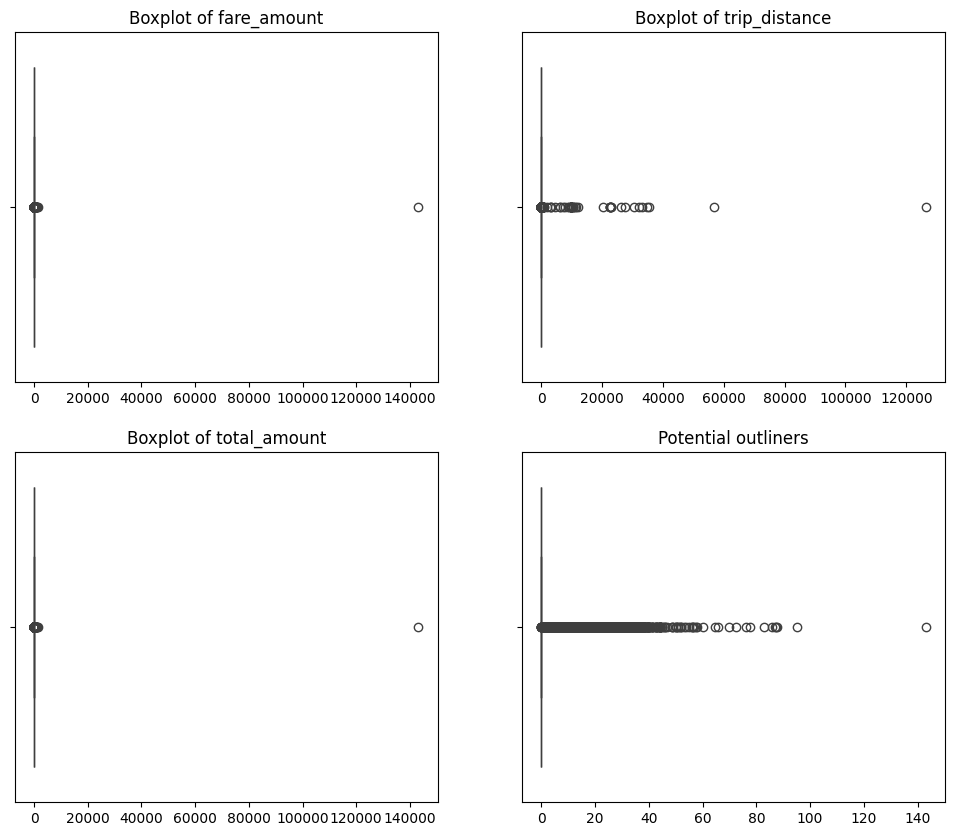

In [46]:
# Visualize potential outliners in several columns
columns_to_plot = ['fare_amount', 'trip_distance', 'total_amount', 'tolls_amount']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")

plt.title('Potential outliners')
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [47]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [48]:
# Continue with outlier handling

# Drop records where pickup time is later than dropoff time
df = df[~(df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime'])]
# Drop records where trip distance is positive but duration is zero (invalid trip duration)
df = df[~((df['trip_distance'] > 0) & (df['trip_duration_in_minutes'] == 0))]
# Replace invalid payment type (e.g., 0) with the most frequent valid value
df['payment_type'] = df['payment_type'].replace(0, df['payment_type'].mode()[0])
# Drop records where fare is zero but tip is positive (illogical case)
df = df[~((df['fare_amount'] == 0) & (df['tip_amount'] > 0))]
# Replace invalid VendorID (not 1 or 2) with the median VendorID
df.loc[~df['VendorID'].isin([1, 2]), 'VendorID'] = df['VendorID'].median()
# Replace invalid RatecodeID (not in 1–6) with the median RatecodeID
df.loc[~df['RatecodeID'].isin([1, 2, 3, 4, 5, 6]), 'RatecodeID'] = df['RatecodeID'].median()
# Drop records where distance is 0 but pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['DOLocationID'] != df['PULocationID']))]
# Drop records where fare is 0 but pickup and dropoff zones are different
df = df[~((df['fare_amount'] == 0) & (df['DOLocationID'] != df['PULocationID']))]
# Drop extreme outliers where distance is more than 250 miles
df = df[df['trip_distance'] <= 250]
# Drop extreme outliers where fare amount is more than $500
df = df[df['fare_amount'] <= 400]
# Drop records where congestion surcharge is greater than the total amount
df = df[~(df['congestion_surcharge'] > df['total_amount'])]
# Drop records where total amount is zero but there is a positive distance
df = df[~((df['total_amount'] == 0) & (df['trip_distance'] > 0))]
# Drop records where fare is zero but distance is positive
df = df[~((df['fare_amount'] == 0) & (df['trip_distance'] > 0))]
# Replace 0 passenger count with median (assuming 0 is invalid)
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].median())
# Drop records where congestion surcharge is greater than the total amount (invalid case)
df = df[~(df['congestion_surcharge'] > df['total_amount'])]
# Drop records where total amount is zero but trip distance is greater than zero (impossible case)
df = df[~((df['total_amount'] == 0) & (df['trip_distance'] > 0))]
# Drop records where fare amount is zero but trip distance is greater than zero (invalid fare)
df = df[~((df['fare_amount'] == 0) & (df['trip_distance'] > 0))]
# Replace zero passenger counts with the median value (as 0 passengers is likely invalid)
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].median())
# Drop records where trip distance is nearly 0 but fare amount more than 300
df = df[~((df['trip_distance'] <= 0.2) & (df['fare_amount'] >= 300))]


In [49]:
# Do any columns need standardising?

# Convert RatecodeID to integer type
df['RatecodeID'] = df['RatecodeID'].astype(int)
# Convert passenger_count to integer type
df['passenger_count'] = df['passenger_count'].astype(int)


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [50]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'trip_duration_in_minutes']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

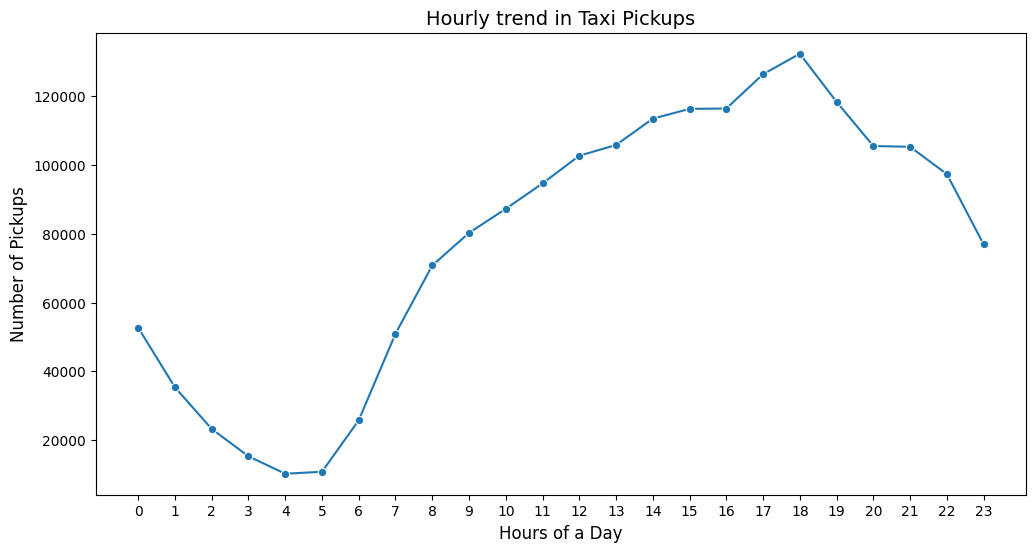

In [51]:
# Find and show the hourly trends in taxi pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['hour'] = df['tpep_pickup_datetime'].dt.hour
trip_hourly = pd.DataFrame()
trip_hourly['count'] = df.groupby('hour').size().astype(int)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=trip_hourly.index, y=trip_hourly['count'], marker='o')
plt.title('Hourly trend in Taxi Pickups', fontsize=14)
plt.xlabel("Hours of a Day", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(range(0, 24))
plt.show()

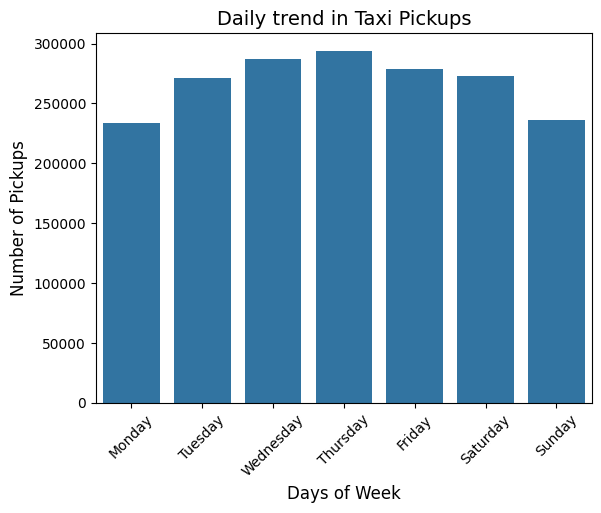

In [52]:
# Find and show the daily trends in taxi pickups (days of the week)
df['days_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
trip_daily = pd.DataFrame()
trip_daily['count'] = df.groupby('days_of_week').size().astype(int)
days_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
trip_daily.index = trip_daily.index.map(days_map)

# Plot
sns.barplot(x=trip_daily.index, y=trip_daily['count'])
plt.title('Daily trend in Taxi Pickups', fontsize=14)
plt.xlabel("Days of Week", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(rotation=45)
plt.show()

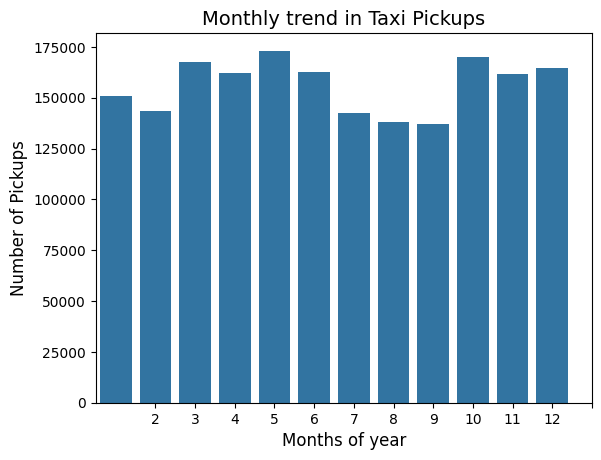

In [53]:
# Show the monthly trends in pickups
df['month'] = df['tpep_pickup_datetime'].dt.month
trip_monthly = pd.DataFrame()
trip_monthly['count'] = df.groupby('month').size().astype(int)

# Plot
sns.barplot(x=trip_monthly.index, y=trip_monthly['count'])
plt.title('Monthly trend in Taxi Pickups', fontsize=14)
plt.xlabel("Months of year", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(range(1, 13))
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [54]:
# Analyse the above parameters
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
# Check for zero or negative values
# Note: Negative values might have already been removed during outlier handling, so this will mainly report the presence of zero values
for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}: {zero_count} zero values, {negative_count} negative values")


fare_amount: 235 zero values, 0 negative values
tip_amount: 417301 zero values, 0 negative values
total_amount: 180 zero values, 0 negative values
trip_distance: 15832 zero values, 0 negative values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [55]:
# Create a df with non zero entries for the selected parameters.
df_none_zero = df[~((df[['fare_amount', 'tip_amount', 'total_amount']] == 0).any(axis=1)) & ~((df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID']))]


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

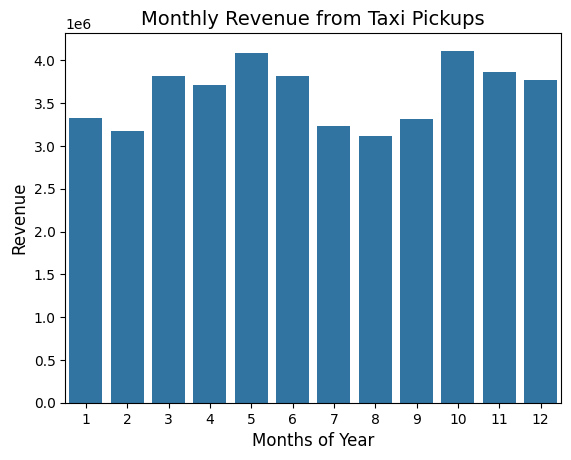

In [56]:
# Group data by month and analyse monthly revenue
monthly_revenue = pd.DataFrame()
monthly_revenue['revenue'] = df_none_zero.groupby('month')['total_amount'].sum()

# Plot
sns.barplot(data=monthly_revenue, y='revenue', x='month')
plt.title('Monthly Revenue from Taxi Pickups', fontsize=14)
plt.xlabel('Months of Year', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

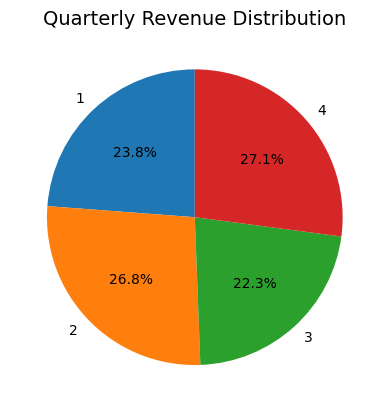

In [57]:
# Calculate proportion of each quarter

# Extract the quarter from the pickup datetime
df_none_zero['quarter'] = df_none_zero['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = pd.DataFrame()
# Calculate total revenue (sum of total_amount) for each quarter
quarterly_revenue['revenue'] = df_none_zero.groupby('quarter')['total_amount'].sum()
# Calculate the proportion of total revenue for each quarter
quarterly_revenue['proportion'] = quarterly_revenue['revenue'] / quarterly_revenue['revenue'].sum() * 100

# Plot
quarterly_revenue['proportion'].plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Quarterly Revenue Distribution", fontsize=14)
plt.ylabel("")
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

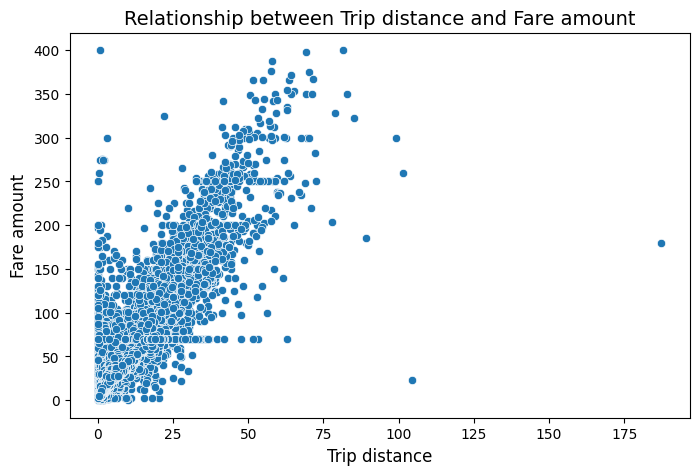

In [58]:
# Show how trip fare is affected by distance
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_none_zero[df_none_zero['trip_distance'] != 0], x='trip_distance', y='fare_amount')
plt.title('Relationship between Trip distance and Fare amount', fontsize=14)
plt.xlabel('Trip distance', fontsize=12)
plt.ylabel('Fare amount', fontsize=12)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

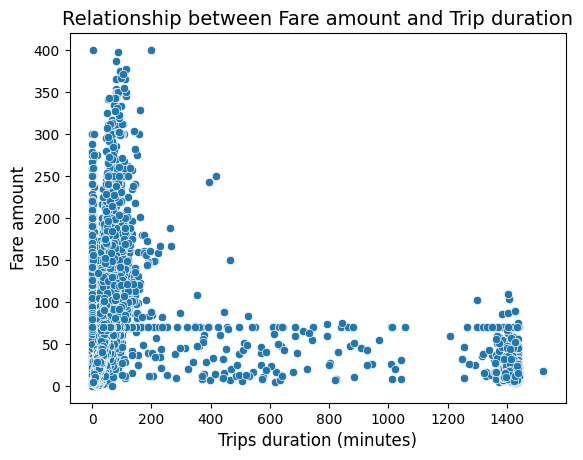

In [59]:
# Show relationship between fare and trip duration
sns.scatterplot(x=df_none_zero['trip_duration_in_minutes'], y=df_none_zero['fare_amount'])
plt.title('Relationship between Fare amount and Trip duration', fontsize=14)
plt.xlabel('Trips duration (minutes)', fontsize=12)
plt.ylabel('Fare amount', fontsize=12)
plt.show()

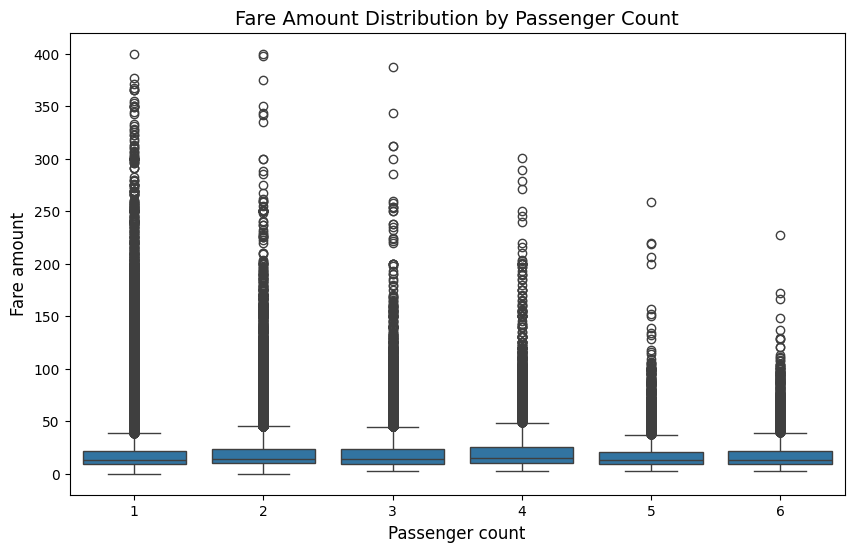

In [60]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_none_zero, x='passenger_count', y='fare_amount')
plt.title('Fare Amount Distribution by Passenger Count', fontsize=14)
plt.xlabel('Passenger count', fontsize=12)
plt.ylabel('Fare amount', fontsize=12)
plt.show()


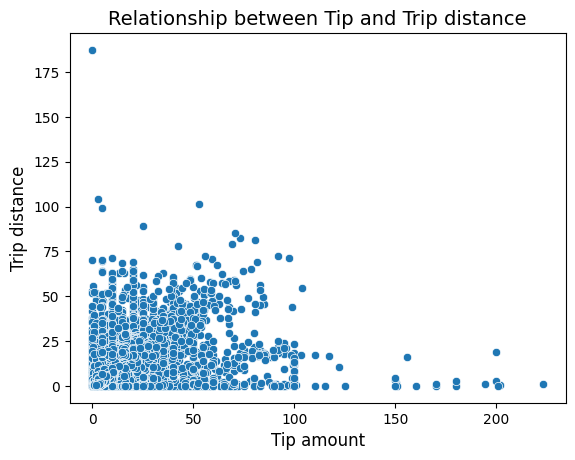

In [61]:
# Show relationship between tip and trip distance
sns.scatterplot(x=df_none_zero['tip_amount'], y=df_none_zero['trip_distance'])
plt.title('Relationship between Tip and Trip distance', fontsize=14)
plt.xlabel('Tip amount', fontsize=12)
plt.ylabel('Trip distance', fontsize=12)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

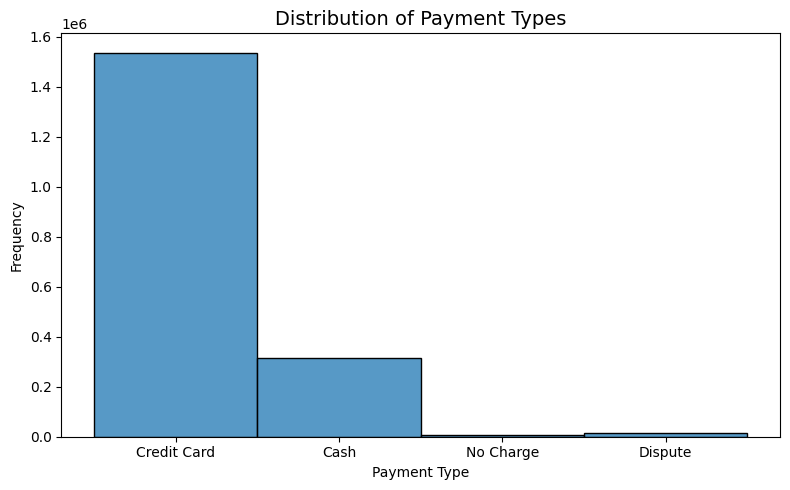

In [62]:
# Analyse the distribution of different payment types (payment_type).
plt.figure(figsize=(8, 5))
sns.histplot(df['payment_type'], discrete=True)
plt.xticks(ticks=range(1, 5), labels=["Credit Card", "Cash", "No Charge", "Dispute"])
plt.title('Distribution of Payment Types', fontsize=14)
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [63]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [64]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r"E:\AI master\Assignments\EDA\taxi_zones\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1        0.12        0.00           Newark Airport           1   
1         2        0.43        0.00              Jamaica Bay           2   
2         3        0.08        0.00  Allerton/Pelham Gardens           3   
3         4        0.04        0.00            Alphabet City           4   
4         5        0.09        0.00            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

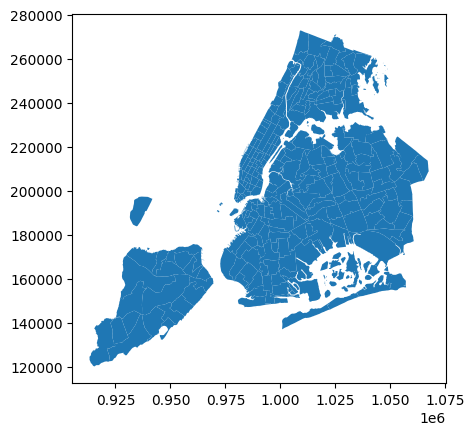

In [65]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [66]:
# Merge zones and trip records using locationID and PULocationID
trip_detail = df.merge(zones, left_on='PULocationID', right_on='LocationID', how='inner')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [67]:
# Group data by location and calculate the number of trips
trip_by_location = pd.DataFrame()
# Group the trip_detail DataFrame by LocationID and count the number of trips in each group
trip_by_location['trips_count'] = trip_detail.groupby('LocationID').size().astype(int)
trip_by_location.sort_values('trips_count', inplace=True, ascending=False)

trip_by_location


trips_count
LocationID             
132               96689
237               88165
161               86917
236               79173
162               66340
...                 ...
245                   1
172                   1
84                    1
27                    1
115                   1

[255 rows x 1 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [68]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trip_by_location, left_on='LocationID', right_on=trip_by_location.index)


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

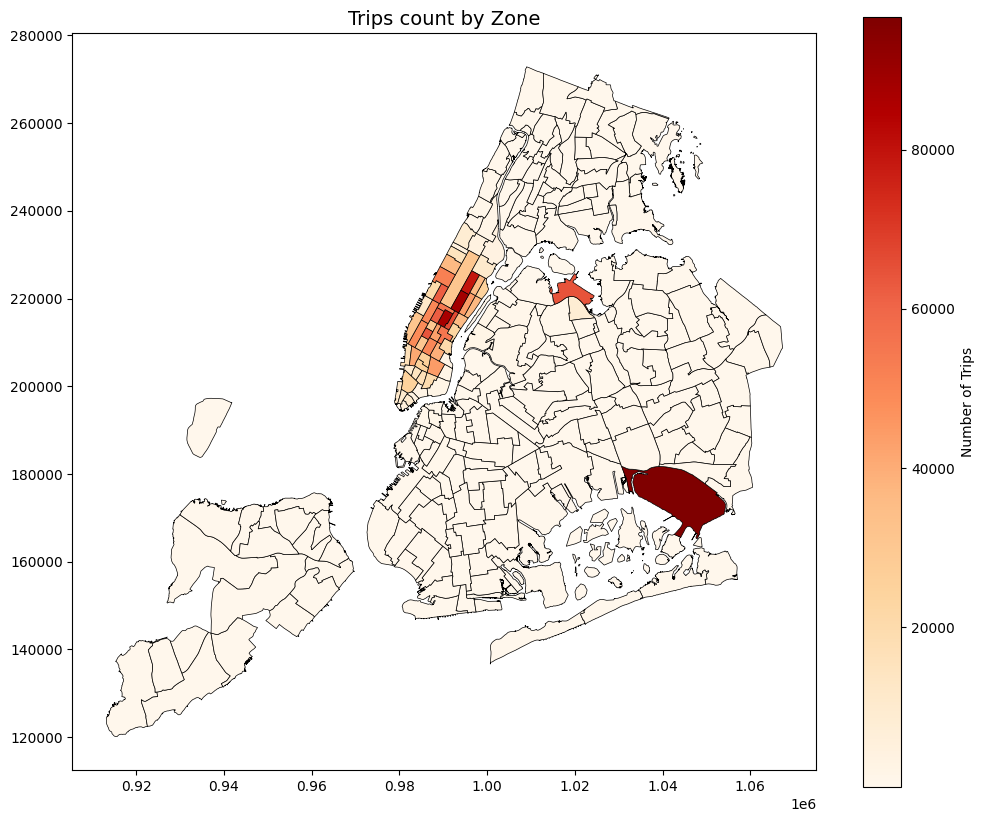

In [69]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column="trips_count", cmap="OrRd", linewidth=0.5, edgecolor="black", legend=True, ax=ax,
           legend_kwds={'label': 'Number of Trips', 'orientation': 'vertical'})

plt.title("Trips count by Zone", fontsize=14)
plt.show()

In [70]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values('trips_count', ascending=False)
# Display top 10 zones sorted by the number of trips
zones[['zone', 'borough', 'trips_count']].nlargest(10, 'trips_count')

zone    borough  trips_count
125                   JFK Airport     Queens        96689
229         Upper East Side South  Manhattan        88165
154                Midtown Center  Manhattan        86917
228         Upper East Side North  Manhattan        79173
155                  Midtown East  Manhattan        66340
131             LaGuardia Airport     Queens        64321
178  Penn Station/Madison Sq West  Manhattan        63912
222     Times Sq/Theatre District  Manhattan        62129
135           Lincoln Square East  Manhattan        62059
163                   Murray Hill  Manhattan        55415

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [71]:
# Find routes which have the slowest speeds at different times of the day

# Filter trips where pickup and dropoff locations are different and the trip duration is greater than 0
route = df[(df['PULocationID'] != df['DOLocationID']) & (df['trip_duration_in_minutes'] > 0)]
# Calculate the average trip duration and median trip distance for each group of 'pickup location - dropoff location - hour'
trip_duration_on_route = route.groupby(['PULocationID', 'DOLocationID', 'hour']).agg(avg_trip_duration=('trip_duration_in_minutes', 'mean'), 
                                                                                    median_trip_distance=('trip_distance', 'median')).reset_index()
# Calculate average speed in miles per hour for each route and hour
trip_duration_on_route['speed_mph'] = trip_duration_on_route['median_trip_distance'] / (trip_duration_on_route['avg_trip_duration'] / 60)
# Find the slowest route for each hour based on minimum average speed
slowest_routes_by_hour = trip_duration_on_route.loc[trip_duration_on_route.groupby('hour')['speed_mph'].idxmin(), 
                                                    ['hour', 'PULocationID', 'DOLocationID', 'speed_mph']].reset_index(drop=True)

slowest_routes_by_hour

hour  PULocationID  DOLocationID  speed_mph
0      0            74           116       0.20
1      1           151            24       0.11
2      2           144           100       0.12
3      3            45           249       0.14
4      4           237           238       0.12
5      5           231            61       0.20
6      6            70           138       0.09
7      7            13           209       0.07
8      8           100             7       0.04
9      9           113           244       0.08
10    10            43            10       0.02
11    11           220           236       0.10
12    12           124           129       0.07
13    13           232            65       0.01
14    14           140            39       0.17
15    15           134           265       0.07
16    16           163           255       0.21
17    17           243           264       0.01
18    18           226           145       0.06
19    19           233             5       0.24
20    20           224           113       0.19
21    21            40            65       0.05
22    22           113           235       0.05
23    23           264           168       0.07

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

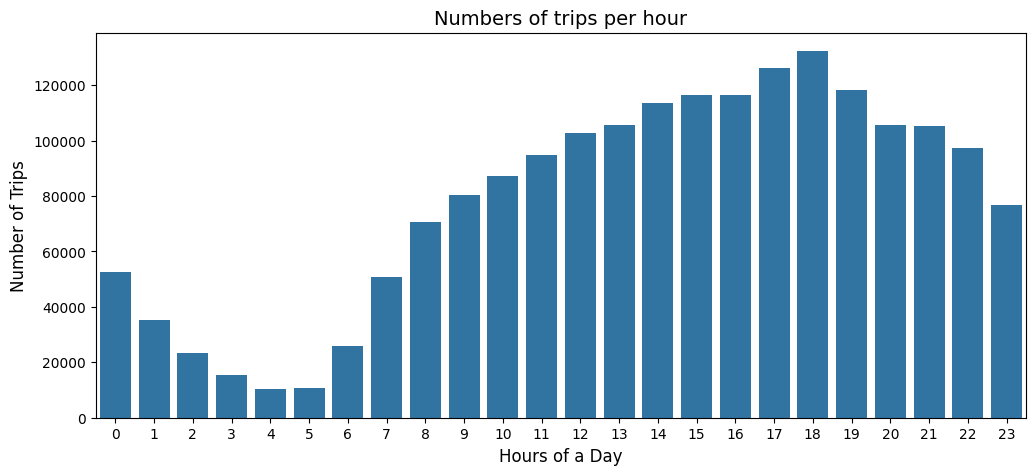

The busiest hour:
       count
hour        
18    132307


In [72]:
# Visualise the number of trips per hour and find the busiest hour

# Each record (row) represents a single trip, and the tpep_pickup_datetime field indicates the start time of that trip. Therefore:
# The number of pickups per hour = The number of trips that started in that hour
# Reuse trip_hourly at section 3.1.2
plt.figure(figsize=(12, 5))
sns.barplot(x=trip_hourly.index, y=trip_hourly['count'])
plt.title('Numbers of trips per hour', fontsize=14)
plt.xlabel("Hours of a Day", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(range(0, 24))
plt.show()

# Find the busiest hour
busiest_hour = trip_hourly.nlargest(1, columns='count')
print("The busiest hour:")
print(busiest_hour)
# print(f"The busiest hour is: {trip_hourly['count'].max()},{trip_hourly['count'].max()}")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [73]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
trip_hourly['actual_trips_count'] = (trip_hourly['count'] / sample_fraction).astype(int)
trip_hourly['actual_trips_count'].nlargest(5)

hour
18    2646140
17    2527260
19    2366240
16    2327620
15    2325700
Name: actual_trips_count, dtype: int32

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

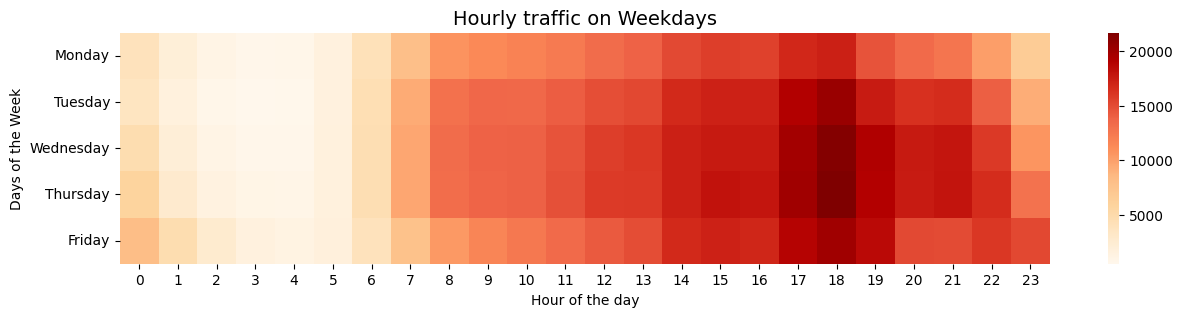

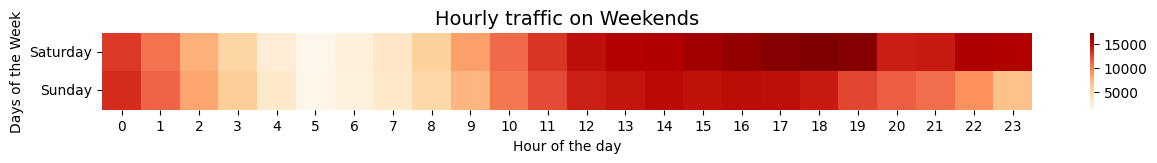

In [74]:
# Compare traffic trends for the week days and weekends

# Filter weedays
weekdays = df[~df['days_of_week'].isin([5, 6])]
# Filter weekends
weekends = df[df['days_of_week'].isin([5, 6])]

# Create a pivot table for weekdays/weekends:
# - Rows are days of the week
# - Columns are hours of the day (e.g., 0 to 23)
# - Values are counts of 'PULocationID' (pickup locations), showing traffic density

traffic_pivot_weekday = weekdays.pivot_table(index='days_of_week', columns='hour', values='PULocationID', aggfunc='count')
traffic_pivot_weekday.index = traffic_pivot_weekday.index.map(days_map)

traffic_pivot_weekend = weekends.pivot_table(index='days_of_week', columns='hour', values='PULocationID', aggfunc='count')
traffic_pivot_weekend.index = traffic_pivot_weekend.index.map(days_map)

# Plot traffic on weekdays
plt.figure(figsize=(15, 3))
plt.title("Hourly traffic on Weekdays", fontsize=14)
sns.heatmap(traffic_pivot_weekday, cmap="OrRd")
plt.yticks(rotation=0)
plt.ylabel('Days of the Week')
plt.xlabel('Hour of the day')
plt.show()

# Plot traffic on weekends
plt.figure(figsize=(15, 1))
plt.title("Hourly traffic on Weekends", fontsize=14)
plt.yticks(rotation=90)
sns.heatmap(traffic_pivot_weekend, cmap="OrRd")
plt.yticks(rotation=0)
plt.ylabel('Days of the Week')
plt.xlabel('Hour of the day')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 pickup zones
   PULocationID  pickup_count
0           132         96689
1           237         88165
2           161         86917
3           236         79173
4           162         66340
5           138         64321
6           186         63912
7           230         62129
8           142         62059
9           170         55415


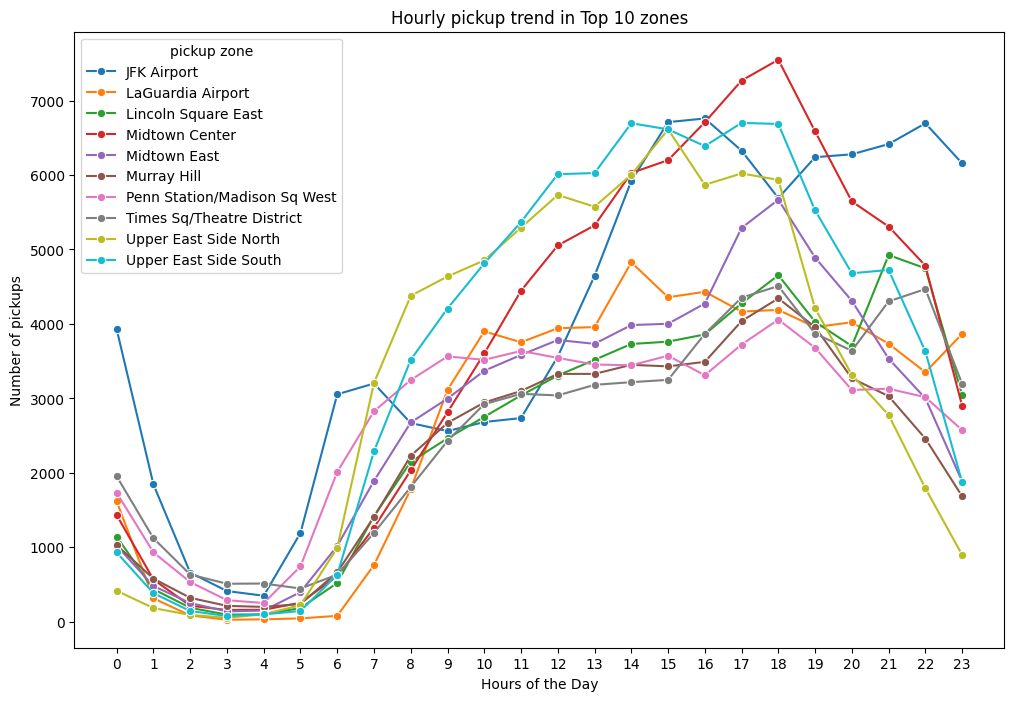

Top 10 dropoff zones
   DOLocationID  dropoff_count
0           236          82895
1           237          78925
2           161          73138
3           230          57437
4           170          55271
5           162          53258
6           142          52595
7           239          52474
8           141          49452
9            68          47393


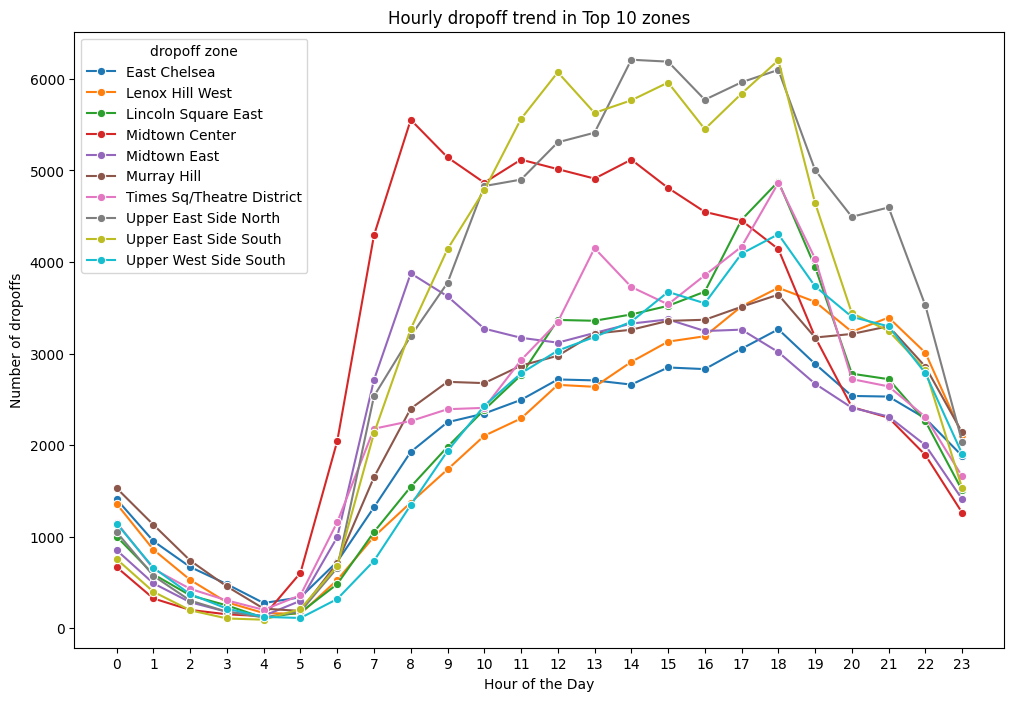

In [75]:
# Find top 10 pickup and dropoff zones

# Group the DataFrame by pickup location and hours of the day. Then count the number of pickups for each location-hour
pickup_hourly = df.groupby(by=['PULocationID', 'hour']).agg(pickup_count=('PULocationID', 'size')).reset_index()
# Find the total number of pickups per location and select the top 10 pickup locations
top_10_pickup_zone = pickup_hourly.groupby('PULocationID')['pickup_count'].sum().reset_index().nlargest(10, 'pickup_count').reset_index(drop=True)
# Filter the hourly pickup data to only include the top 10 busiest pickup locations
top_10_pickup_zone_data = pickup_hourly[pickup_hourly['PULocationID'].isin(top_10_pickup_zone['PULocationID'])]
# Map from location ID to zone name to readable
location_to_zone = zones.set_index('LocationID')['zone'].to_dict()
top_10_pickup_zone_data['PULocationID'] = top_10_pickup_zone_data['PULocationID'].map(location_to_zone)

# Show top 10 pickup zones
print('Top 10 pickup zones')
print(top_10_pickup_zone)

# Plot top 10 pickup zones
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_10_pickup_zone_data, x='hour', y='pickup_count', hue='PULocationID', marker="o")
plt.title("Hourly pickup trend in Top 10 zones")
plt.xlabel("Hours of the Day")
plt.ylabel("Number of pickups")
plt.xticks(ticks=range(0, 24))
plt.legend(title="pickup zone")
plt.show()


# Apply the same approach to find top 10 dropoff zones
dropoff_hourly = df.groupby(by=['DOLocationID', 'hour']).agg(dropoff_count=('DOLocationID', 'size')).reset_index()
top_10_dropoff_zone = dropoff_hourly.groupby('DOLocationID')['dropoff_count'].sum().reset_index().nlargest(10, 'dropoff_count').reset_index(drop=True)
top_10_dropoff_zone_data = dropoff_hourly[dropoff_hourly['DOLocationID'].isin(top_10_dropoff_zone['DOLocationID'])]
top_10_dropoff_zone_data['DOLocationID'] = top_10_dropoff_zone_data['DOLocationID'].map(location_to_zone)
top_10_dropoff_zone

# Show top 10 dropoff zones
print('Top 10 dropoff zones')
print(top_10_dropoff_zone)

# Plot top 10 pickup zones
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_10_dropoff_zone_data, x='hour', y='dropoff_count', hue='DOLocationID', marker="o")
plt.title("Hourly dropoff trend in Top 10 zones")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of dropoffs")
plt.xticks(ticks=range(0, 24))
plt.legend(title="dropoff zone")
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [76]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# For each LocationID in the zones DataFrame, count how many times it appears in the 'DOLocationID' column of the main DataFrame
zones['drop_count'] = zones['LocationID'].apply(lambda x: df[df["DOLocationID"] == x].shape[0])
# Calculate the pickup-to-dropoff ratio for each zone
zones['pick_drop_ratio'] = zones['trips_count'] / zones['drop_count']
# Some zones have no dropoff so it makes the ratio be infinitive. Replace infinite values to ignore them.
zones['pick_drop_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Show top 10 zones has high pickup/dropoff ratio
print("Top 10 zones with high pickup/dropoff ratio")
print(zones[['zone', 'pick_drop_ratio']].nlargest(10, 'pick_drop_ratio'))

# Show bottom 10 zones has high pickup/dropoff ratio
print("\n\nBottom 10 zones with low pickup/dropoff ratio")
print(zones[['zone', 'pick_drop_ratio']].nsmallest(10, 'pick_drop_ratio'))

Top 10 zones with high pickup/dropoff ratio
                             zone  pick_drop_ratio
68                  East Elmhurst             8.38
125                   JFK Airport             4.27
131             LaGuardia Airport             2.63
178  Penn Station/Madison Sq West             1.56
107       Greenwich Village South             1.38
41                   Central Park             1.37
241                  West Village             1.33
155                  Midtown East             1.25
154                Midtown Center             1.19
97               Garment District             1.19


Bottom 10 zones with low pickup/dropoff ratio
                                    zone  pick_drop_ratio
26   Breezy Point/Fort Tilden/Riis Beach             0.03
213                            Stapleton             0.03
237                        West Brighton             0.03
0                         Newark Airport             0.04
108                  Grymes Hill/Clifton             0.04

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [77]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter trips that occur during nighttime hours
trip_nightly = df[(df['hour'] < 5) | (df['hour'] > 23)]

# Group by pickup location, count the number of trips for each location and filter out top 10 pickups zones
top_10_pickup_zones_nightly = trip_nightly.groupby('PULocationID').size().reset_index(name='pickups_count').nlargest(10, 'pickups_count').reset_index(drop=True)
print("Top 10 pickup zones nightly")
print(top_10_pickup_zones_nightly)

# Apply the same approach for top 10 dropoff zones during night hours
top_10_dropoff_zones_nightly = trip_nightly.groupby('DOLocationID').size().reset_index(name='dropoffs_count').nlargest(10, 'dropoffs_count').reset_index(drop=True)
print("\n")
print("Top 10 dropoff zones nightly")
print(top_10_dropoff_zones_nightly)

Top 10 pickup zones nightly
   PULocationID  pickups_count
0            79          12166
1           249           9156
2           148           8140
3           132           7197
4            48           6895
5           114           6635
6           230           4736
7            68           3916
8           164           3888
9           107           3750


Top 10 dropoff zones nightly
   DOLocationID  dropoffs_count
0            79            5833
1            48            4671
2           170            4068
3            68            3784
4           107            3752
5           249            3400
6           141            3193
7           263            3189
8           148            3040
9            90            2920


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

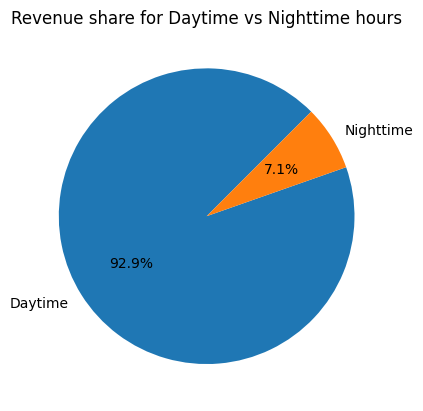

In [78]:
# Filter for night hours (11 PM to 5 AM)

# Nightly trip DataFrame has already created at 3.2.7
trip_nightly

# Filter for daytime hours
trip_daytime = df[~((df['hour'] < 5) | (df['hour'] > 23))]
# Calculate total revenue during daytime and nighttime
revenue_share = [trip_daytime['total_amount'].sum(), trip_nightly['total_amount'].sum()]

# Plot
plt.pie(revenue_share, labels=['Daytime', 'Nighttime'], autopct='%1.1f%%', startangle=45)
plt.title("Revenue share for Daytime vs Nighttime hours")
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

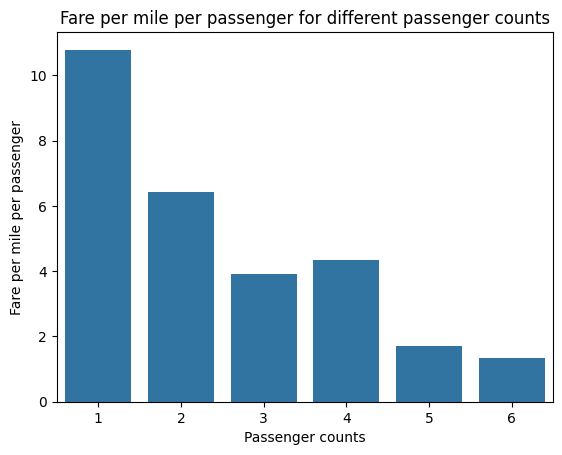

In [79]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out trips with zero distance to avoid division by zero
df = df[df['trip_distance'] != 0]
# Calculate fare per mile for each trip
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
# Group the data by passenger count and compute the average fare per mile for each group
fare_by_pg_count = df.groupby('passenger_count')['fare_per_mile'].mean().reset_index(name='fare_per_mile_avg')
# Calculate fare per mile per passenger
fare_by_pg_count['fare_per_mile_per_pg'] = fare_by_pg_count['fare_per_mile_avg'] / fare_by_pg_count['passenger_count']

# Plot
sns.barplot(data=fare_by_pg_count, x='passenger_count', y='fare_per_mile_per_pg')
plt.title("Fare per mile per passenger for different passenger counts")
plt.xlabel("Passenger counts")
plt.ylabel("Fare per mile per passenger")
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

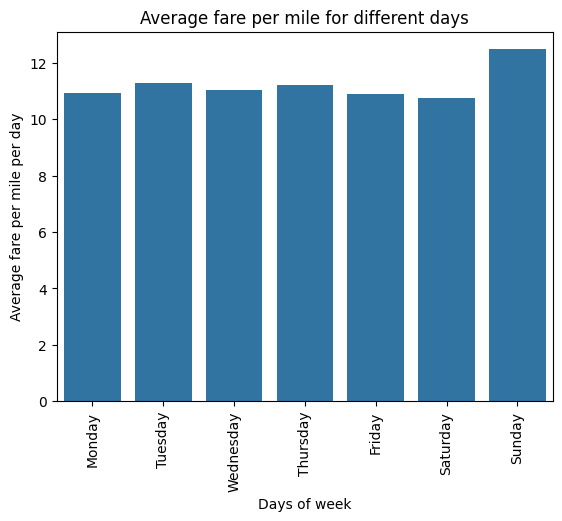

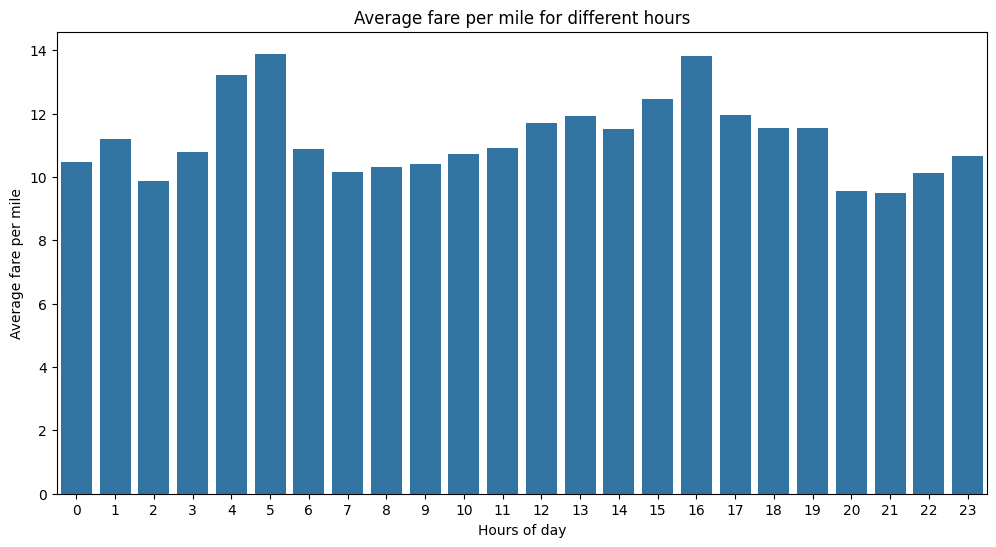

In [80]:
# Compare the average fare per mile for different days and for different times of the day

# Calculate the average fare per mile for each day of the week
fare_by_day = df.groupby('days_of_week')['fare_per_mile'].mean().reset_index(name='fare_per_mile_avg')
# Calculate the average fare per mile for each hour of the day
fare_by_hour = df.groupby('hour')['fare_per_mile'].mean().reset_index(name='fare_per_mile_avg')


# Plot
sns.barplot(data=fare_by_day, x='days_of_week', y='fare_per_mile_avg')
plt.xticks(ticks=range(0, 7), labels=days_map.values(), rotation=90)
plt.title("Average fare per mile for different days")
plt.xlabel("Days of week")
plt.ylabel("Average fare per mile per day")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=fare_by_hour, x='hour', y='fare_per_mile_avg')
plt.xticks(ticks=range(0, 24))
plt.title("Average fare per mile for different hours")
plt.xlabel("Hours of day")
plt.ylabel("Average fare per mile")
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

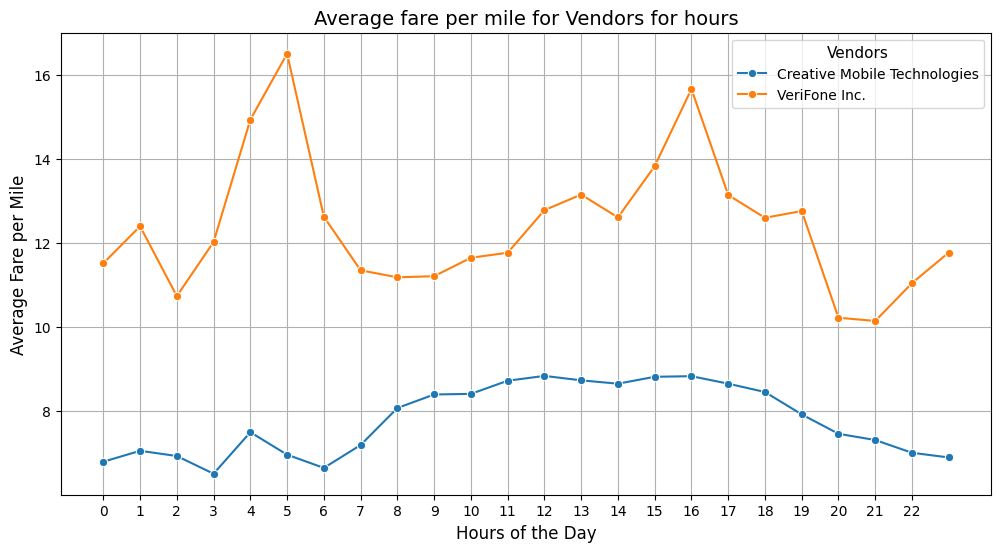

In [81]:
# Compare fare per mile for different vendors

# Calculate the average fare per mile for each vendor-hour
fare_by_vendors = df.groupby(by=['VendorID', 'hour'])['fare_per_mile'].mean().reset_index(name='fare_per_mile_avg')
# Map VendorID to company name for better readability
fare_by_vendors['vendor_name'] = fare_by_vendors['VendorID'].apply(lambda x: "Creative Mobile Technologies" if x == 1 else "VeriFone Inc.")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=fare_by_vendors, x='hour', y='fare_per_mile_avg', hue='vendor_name', marker='o')
plt.legend(title='Vendors', fontsize=10, title_fontsize=11)
plt.xlabel("Hours of the Day", fontsize=12)
plt.xticks(ticks=range(0, 23))
plt.ylabel("Average Fare per Mile", fontsize=12)
plt.title("Average fare per mile for Vendors for hours", fontsize=14)
plt.grid(True)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


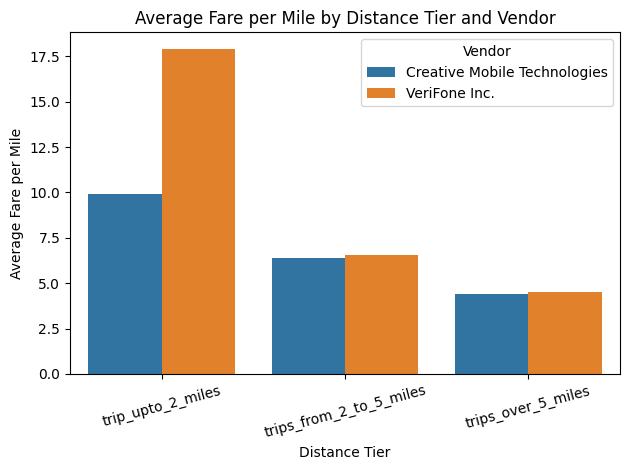

In [82]:
# Function to Define distance tiers
def set_distance_tier(distance):
    if distance <= 2:
        return "trip_upto_2_miles"
    elif 2 < distance <= 5:
        return "trips_from_2_to_5_miles"
    else:
        return "trips_over_5_miles"

# Apply above function to categorize each trip by distance
df['distance_tier'] = df['trip_distance'].apply(set_distance_tier)

# Calculate the average fare per mile for each group of vendor-distance tier
avg_fare_rate = df.groupby(by=['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
# Map VendorID to vendor names for readability
avg_fare_rate['vendor_name'] = avg_fare_rate['VendorID'].apply(lambda x: "Creative Mobile Technologies" if x == 1 else "VeriFone Inc.")

# Plot
sns.barplot(data=avg_fare_rate, x='distance_tier', y='fare_per_mile', hue='vendor_name')
plt.title("Average Fare per Mile by Distance Tier and Vendor")
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare per Mile")
plt.xticks(rotation=15)
plt.legend(title="Vendor")
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [83]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage for each trip
df['tip_percent'] = df['tip_amount'] / df['total_amount']

# Calculate the average tip percent based on distances, passenger counts and pickup times
tip_on_pg_count = df.groupby('passenger_count')['tip_percent'].mean()
tip_on_pickup_hour = df.groupby('hour')['tip_percent'].mean()
tip_on_distance = df.groupby('distance_tier')['tip_percent'].mean()
tip_on_payment_type = df.groupby('payment_type')['tip_percent'].mean()

print('------------------------------------')
print("Average Tip % by Passenger Count")
print(tip_on_pg_count)

print('------------------------------------')
print("Average Tip % by Pickup Hour")
print(tip_on_pickup_hour)

print('------------------------------------')
print("Average Tip % by Distance Tier")
print(tip_on_distance)

print('------------------------------------')
print("Average Tip % by Payment Type")
print(tip_on_payment_type)
print('------------------------------------')

------------------------------------
Average Tip % by Passenger Count
passenger_count
1   0.12
2   0.12
3   0.11
4   0.10
5   0.12
6   0.12
Name: tip_percent, dtype: float64
------------------------------------
Average Tip % by Pickup Hour
hour
0    0.12
1    0.12
2    0.12
3    0.11
4    0.10
5    0.10
6    0.11
7    0.12
8    0.12
9    0.12
10   0.12
11   0.12
12   0.12
13   0.12
14   0.12
15   0.12
16   0.12
17   0.12
18   0.12
19   0.12
20   0.12
21   0.13
22   0.12
23   0.12
Name: tip_percent, dtype: float64
------------------------------------
Average Tip % by Distance Tier
distance_tier
trip_upto_2_miles         0.12
trips_from_2_to_5_miles   0.12
trips_over_5_miles        0.11
Name: tip_percent, dtype: float64
------------------------------------
Average Tip % by Payment Type
payment_type
1   0.15
2   0.00
3   0.00
4   0.00
Name: tip_percent, dtype: float64
------------------------------------


In [84]:
# Calculate correlation of all numerical columns with tip_percent to gain more insights
tip_percent_corr = df.corr(numeric_only=True)[['tip_percent']]
tip_percent_corr.sort_values('tip_percent')

tip_percent
payment_type                    -0.69
fare_amount                     -0.05
trip_distance                   -0.04
RatecodeID                      -0.03
trip_duration_in_minutes        -0.03
passenger_count                 -0.02
fare_per_mile                   -0.02
Airport_fee                     -0.01
days_of_week                    -0.01
tolls_amount                    -0.01
month                           -0.00
improvement_surcharge            0.01
VendorID                         0.02
mta_tax                          0.02
hour                             0.03
extra                            0.03
PULocationID                     0.03
DOLocationID                     0.04
total_amount                     0.07
congestion_surcharge             0.13
tip_amount                       0.58
tip_percent                      1.00

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

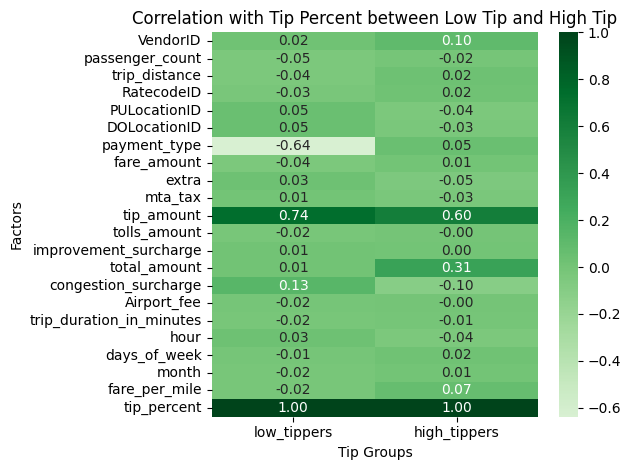

In [85]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Filter the trip with low tip percent
low_tip = df[df['tip_percent'] < 0.10]
low_tip_corr = low_tip.corr(numeric_only=True)[['tip_percent']]

# Filter the trip with hgih tip percent
high_tip = df[df['tip_percent'] > 0.25]
high_tip_corr = high_tip.corr(numeric_only=True)[['tip_percent']]

# Merge 2 Dataframes for comparsion
merged_corr = pd.concat([low_tip_corr, high_tip_corr], axis=1)
merged_corr.columns = ['low_tippers', 'high_tippers']

# Plot
sns.heatmap(merged_corr, annot=True, cmap='Greens', center=0, fmt=".2f")
plt.title("Correlation with Tip Percent between Low Tip and High Tip")
plt.xlabel("Tip Groups")
plt.ylabel("Factors")
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

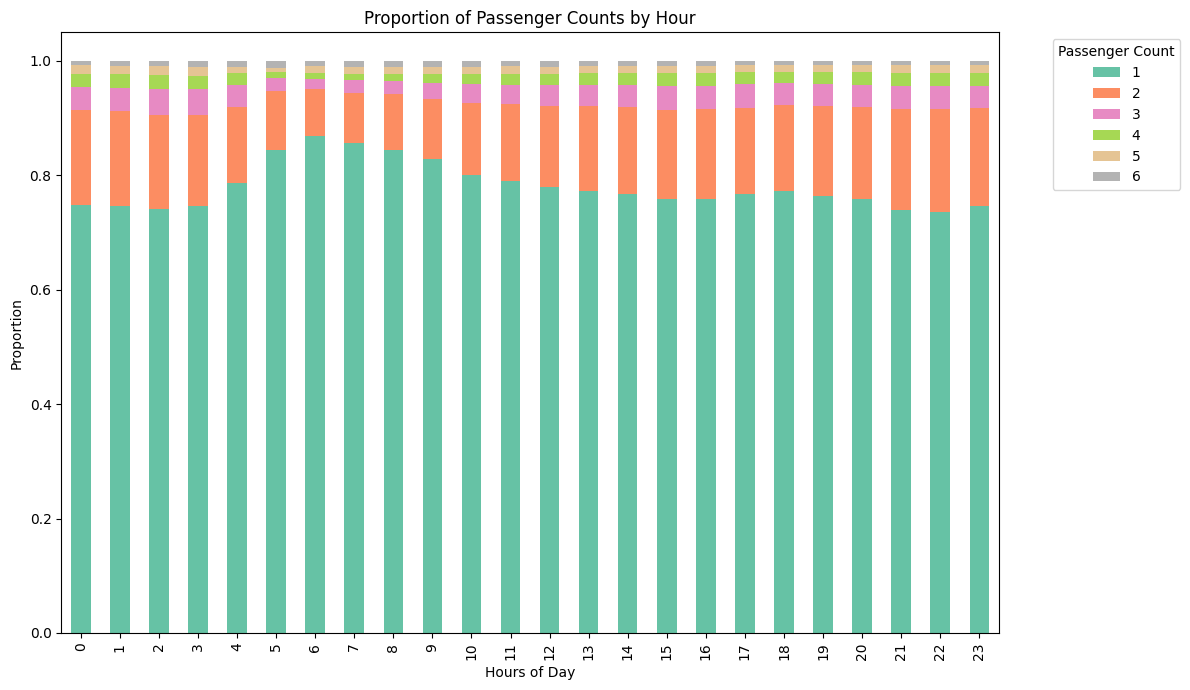

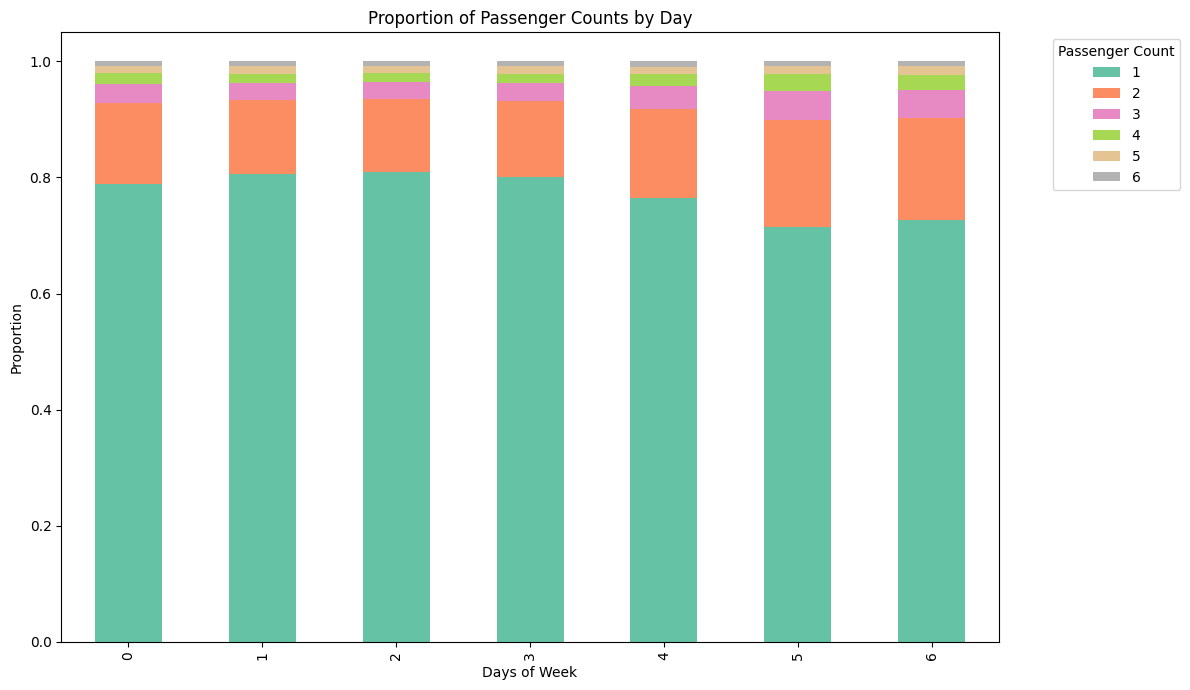

In [86]:
# See how passenger count varies across hours and days
pg_count_hourly = df.groupby(['hour', 'passenger_count']).size().unstack().fillna(0)

# Convert to proportion
pg_count_hourly_prop = pg_count_hourly.div(pg_count_hourly.sum(axis=1), axis=0)

# Plot
pg_count_hourly_prop.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set2')
plt.title("Proportion of Passenger Counts by Hour")
plt.ylabel("Proportion")
plt.xlabel("Hours of Day")
plt.legend(title="Passenger Count", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


pg_count_hourly = df.groupby(['days_of_week', 'passenger_count']).size().unstack().fillna(0)

# Convert to proportion
pg_count_hourly_prop = pg_count_hourly.div(pg_count_hourly.sum(axis=1), axis=0)

# Plot
pg_count_hourly_prop.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set2')
plt.title("Proportion of Passenger Counts by Day")
plt.ylabel("Proportion")
plt.xlabel("Days of Week")
plt.legend(title="Passenger Count", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

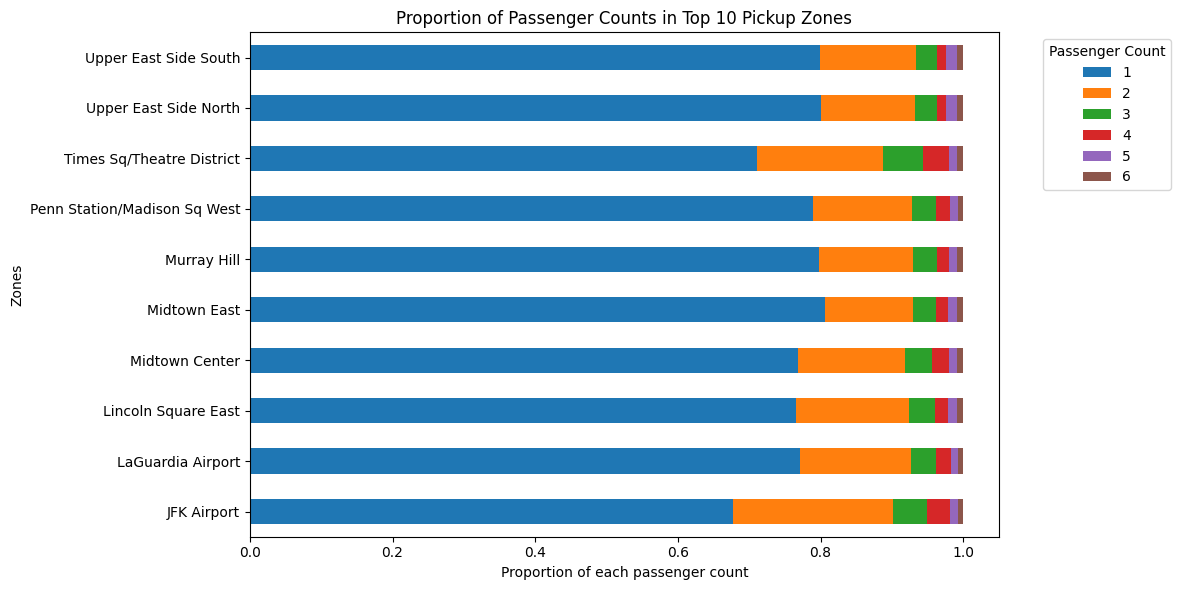

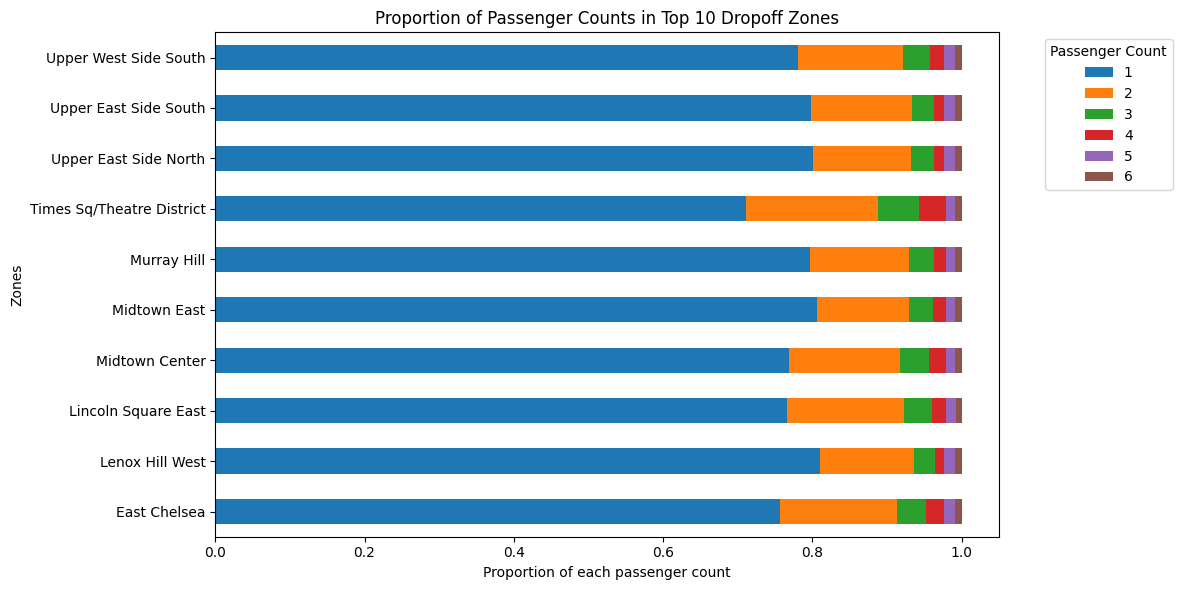

In [87]:
# How does passenger count vary across zones

# Note: There are many zones so it will impossible to analyze across all of them. So focus on top 10 zones with highest pickups/dropoffs

# Count the numbers of trips for each group of Pickup loctaion - passenger count
pg_count_by_top_pickup_zone = trip_detail[trip_detail['LocationID'].isin(top_10_pickup_zone['PULocationID'])].groupby(
    ['zone', 'passenger_count']).size().unstack().fillna(0)


# Convert to proportion
pg_count_by_top_pickup_zone_prop = pg_count_by_top_pickup_zone.div(pg_count_by_top_pickup_zone.sum(axis=1), axis=0)

# Plot
pg_count_by_top_pickup_zone_prop.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.title("Proportion of Passenger Counts in Top 10 Pickup Zones")
plt.ylabel("Zones")
plt.xlabel("Proportion of each passenger count")
plt.legend(title="Passenger Count", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


# Count the numbers of trips for each group of Dropoff loctaion - passenger count
pg_count_by_top_dropoff_zone = trip_detail[trip_detail['LocationID'].isin(top_10_dropoff_zone['DOLocationID'])].groupby(
    ['zone', 'passenger_count']).size().unstack().fillna(0)

# Convert to proportion
pg_count_by_top_dropoff_zone_prop = pg_count_by_top_dropoff_zone.div(pg_count_by_top_dropoff_zone.sum(axis=1), axis=0)

# Plot
pg_count_by_top_dropoff_zone_prop.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.title("Proportion of Passenger Counts in Top 10 Dropoff Zones")
plt.ylabel("Zones")
plt.xlabel("Proportion of each passenger count")
plt.legend(title="Passenger Count", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

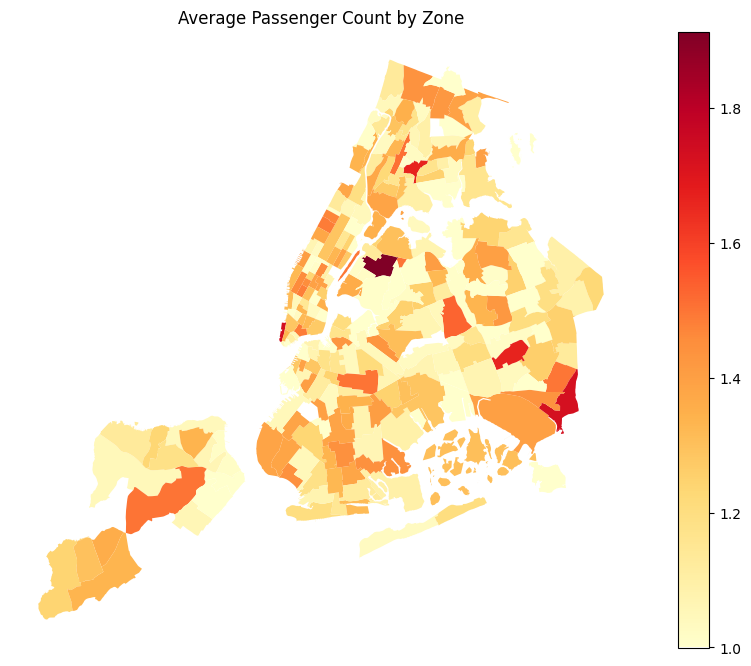

In [88]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame

# Create a new column for the average passenger count in each zone
zones['avg_passenger_count'] = df.groupby('PULocationID')['passenger_count'].mean()

# Plot
zones.plot(column='avg_passenger_count', cmap='YlOrRd', legend=True, figsize=(12, 8))
plt.title("Average Passenger Count by Zone")
plt.axis('off')
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [89]:
zones.dtypes

OBJECTID                  int32
Shape_Leng              float64
Shape_Area              float64
zone                     object
LocationID                int32
borough                  object
geometry               geometry
trips_count               int32
drop_count                int64
pick_drop_ratio         float64
avg_passenger_count     float64
dtype: object

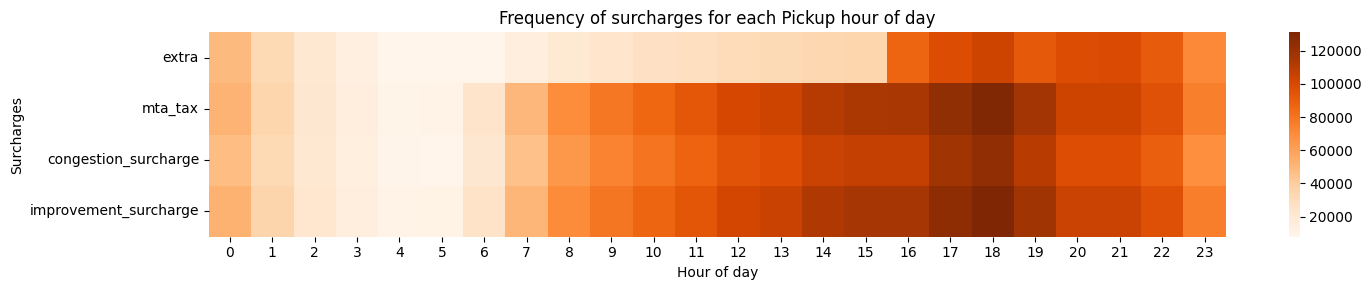

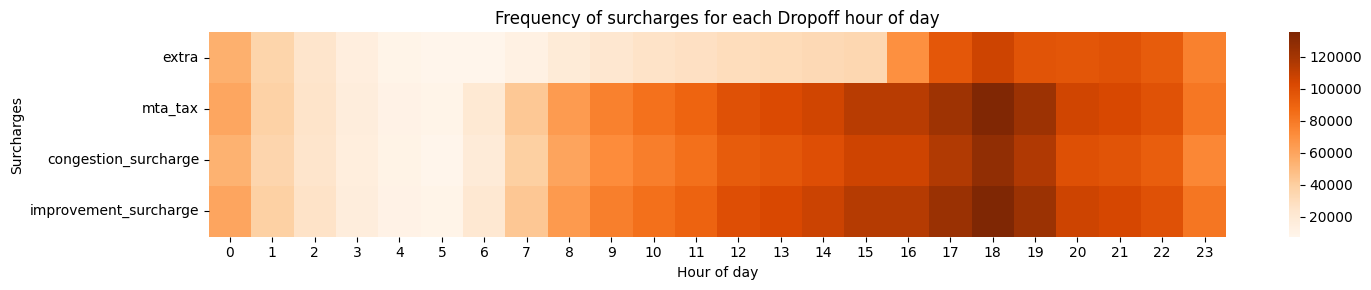

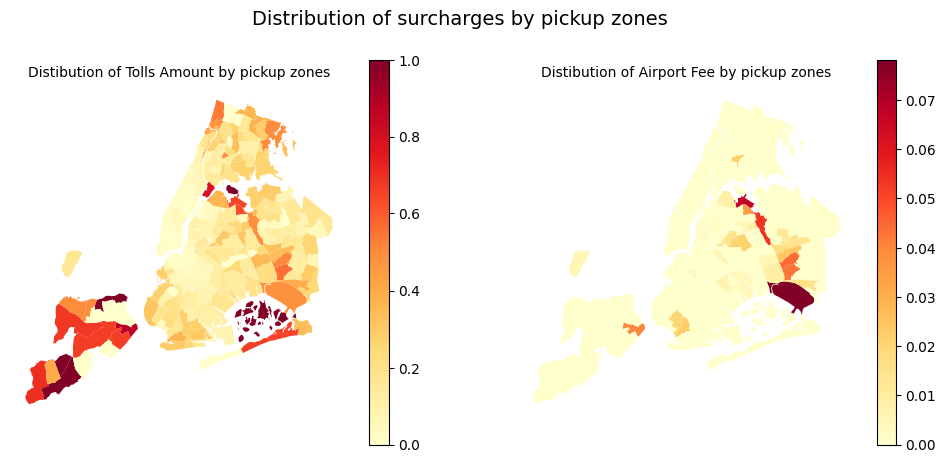

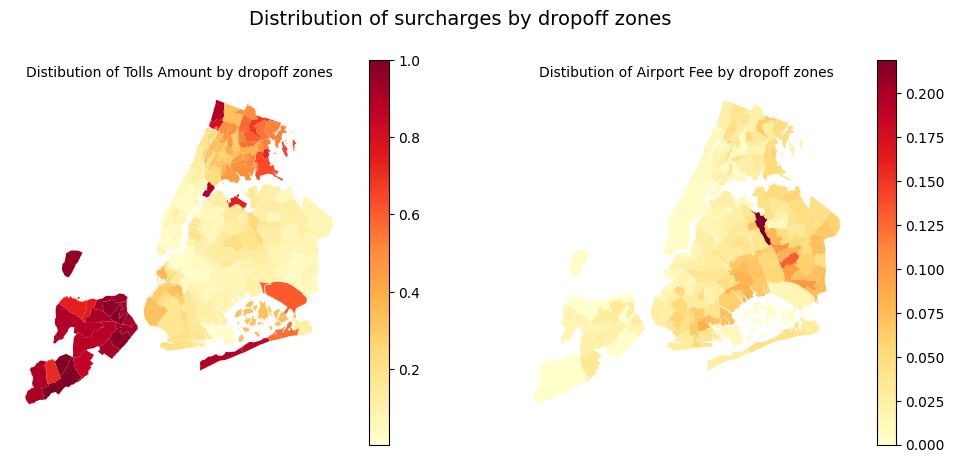

In [90]:
# How often is each surcharge applied?

# trip_detail DataFrame that contains detail trips and zones data already existed at 3.1.10
# trip_detail 'hour' is extracted from pickup time and zone is extracted from pickup location
# Add columns dropoff_hour and dropoff_zone for trip_detail
trip_detail['dropoff_hour'] = trip_detail['tpep_dropoff_datetime'].dt.hour
trip_detail = trip_detail.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')



# Categorize the surcharges based on time and zone
charges_by_time = ['extra', 'mta_tax', 'congestion_surcharge', 'improvement_surcharge']
charges_by_zone = ['tolls_amount', 'Airport_fee']

pickup_time_charge_freq = trip_detail.groupby('hour')[charges_by_time].apply(lambda x: (x > 0).sum())
dropoff_time_charge_freq = trip_detail.groupby('dropoff_hour')[charges_by_time].apply(lambda x: (x > 0).sum())

# Plot frequency of surcharges for each Pickup hour of day
plt.figure(figsize=(15, 3))
sns.heatmap(pickup_time_charge_freq.T, fmt="d", cmap="Oranges")
plt.title("Frequency of surcharges for each Pickup hour of day")
plt.xlabel("Hour of day")
plt.ylabel("Surcharges")
plt.tight_layout()
plt.show()

# Plot frequency of surcharges for each Dropoff hour of day
plt.figure(figsize=(15, 3))
sns.heatmap(dropoff_time_charge_freq.T, fmt="d", cmap="Oranges")
plt.title("Frequency of surcharges for each Dropoff hour of day")
plt.xlabel("Hour of day")
plt.ylabel("Surcharges")
plt.tight_layout()
plt.show()


def plot_charge_maps_by_zone(gdf, charge_cols, zone_type):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    axes = axes.flatten()

    # Loop through each surcharge to create individual maps
    for i, charge in enumerate(charge_cols):
        ax = axes[i]
        gdf.plot(column=charge if zone_type=='pickup' else charge + "_dropoff", linewidth=0.3, ax=ax, cmap='YlOrRd', legend=True)
        ax.set_title(f"Distibution of {charge.replace('_', ' ').title()} by {zone_type} zones", fontsize=10)
        ax.axis('off')

    plt.suptitle(f"Distribution of surcharges by {zone_type} zones", fontsize=14)
    plt.show()


pickup_zone_charge_freq = trip_detail.groupby('PULocationID')[charges_by_zone].apply(lambda x: (x > 0).mean()).reset_index()
zones = zones.merge(pickup_zone_charge_freq, left_on='LocationID', right_on='PULocationID', how='left')
dropoff_zone_charge_freq = trip_detail.groupby('DOLocationID')[charges_by_zone].apply(lambda x: (x > 0).mean()).reset_index()
# Change the columns name of surcharges by dropoff zones to separate with columns of pickup zones
dropoff_zone_charge_freq.rename(columns={col: col + '_dropoff' for col in dropoff_zone_charge_freq.columns if col != 'DOLocationID'}, inplace=True)
zones = zones.merge(dropoff_zone_charge_freq, left_on='LocationID', right_on='DOLocationID', how='left')


# Plot distribution of surcharges by pickup zones
plot_charge_maps_by_zone(zones, charges_by_zone, "pickup")
# Plot distribution of surcharges by dropoff zones
plot_charge_maps_by_zone(zones, charges_by_zone, "dropoff")

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Peak Hours**: Focus dispatch between **8–10 AM** and **4–7 PM**.  
**Busy Days**: Tuesday to Thursday are highest in demand.  
**Hot Zones**: Prioritize **JFK**, **LaGuardia**, **Midtown**, and **Upper East Side**.  
**Night Shifts**: Allocate more cabs to JFK and Manhattan at night (**12–5 AM**).  
**Avoid Congestion**: Reroute during rush hours in congested zones.  
**Group Trends**: Promote ride-sharing in evenings (**2–3 passengers**).  
**Payment Strategy**: Encourage card payments for better tipping.  
**Surcharge Timing**: Most surcharges apply from **8 AM–8 PM** – optimize pricing.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Strategically position cabs in high-demand zones like JFK Airport, Midtown,
and Upper East Side during peak hours (4–7 PM) and weekdays (especially Thursday).
During weekends, shift more cabs to nightlife and entertainment zones for late-night demand. 
Adjust distribution seasonally, increasing coverage in May and October when trip volumes peak.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Use dynamic pricing based on demand peaks - raise fare per mile slightly during rush hours (4–7 PM) and months with high demand (May, October). Consider offering discounts or shared-ride promotions for low-demand hours and areas. Encourage multi-passenger rides with lower fare-per-mile-per-passenger to increase utilization. Adjust vendor pricing models to close the gap in average fare per mile while staying competitive.